# Consulting Project for house price investor

#### _Name - 





In this project, we will consult for a property investor, and advise on American regions, major cities that they should invest in in. We will isolate a group of the most promising regions, then run forecasting analysis to pinpoint those regions with the very best potential.

dataset:https://www.zillow.com/research/data/

## 1. Bring In Required Libraries
Import the libraries we'll need for this project, and define our visualisation preferences.

In [1]:

from __future__ import print_function
import torch
x = torch.rand(5,3)
print(x)

tensor([[0.0117, 0.0967, 0.0123],
        [0.8476, 0.9529, 0.3603],
        [0.2899, 0.0704, 0.1319],
        [0.1258, 0.2502, 0.4352],
        [0.5357, 0.1943, 0.5991]])


In [2]:
#For the initial data exploration
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta

In [3]:
#For data visualisation
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams


In [4]:
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
#For the time series modelling
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save models
import pickle

In [6]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB91_Crimson = '#CD3333'
CB91_Black = '#000000'
CB91_Oliver = '#9ACD32'
CB91_Orange = '#FF8247'


CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'

In [7]:
#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']
CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

In [8]:
#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
                CB91_AmberD, CB91_PinkD, CB91_VioletD]

In [9]:
#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


# 2. Data Pre-Processing

In [10]:
df = pd.read_csv('Data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [11]:
df['Metro'].fillna('Not known', inplace = True)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


We not that just over 1000 regions do not have full price data(though all have it from about 2014).
April 2007 was a critical time in the USA housing market(it was the peak before the time, then house prices fell dramatically). We will use full data after this time period, therefore we should aim to delete any regions that do not have full data after April 2007.

Text(0.5, 1.0, 'Number of Regions that Do not have price Data at given date')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


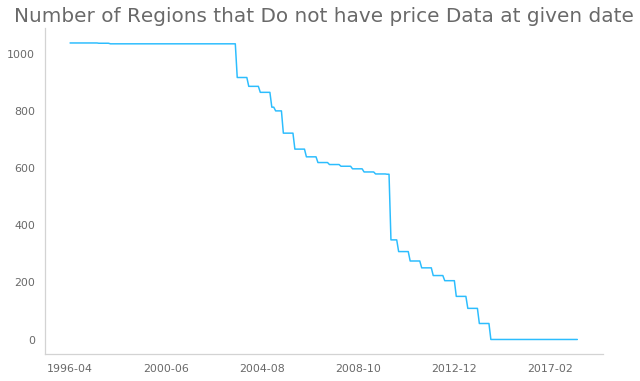

In [12]:
plt.figure(figsize=(10,6))
df.iloc[:,7:].isna().sum().plot()#####. Columns after No.7'
plt.title('Number of Regions that Do not have price Data at given date')

In [13]:
df.columns[139:]

Index(['2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09',
       '2007-10', '2007-11', '2007-12', '2008-01',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=133)

In [14]:
df.dropna(inplace=True, subset = list(df.columns[139:]))
#df.columns[139:] represents the months of April'07 onwards...a

In [15]:
list(df.columns[:7])

['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

In [16]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')
df.columns = list(df.columns[:7]) + list(get_datetimes(df))

In [17]:
df_states = gpd.read_file("./States/states.shp")
#Change map projection as normal,because 
#All projections of locations on the Earth into a two-dimensional plane are distortions
df_states = df_states.to_crs(epsg = 3395)
#Get the states in alphabetical order and set index
df_states = df_states.sort_values('STATE_ABBR')
df_states.set_index('STATE_ABBR', inplace = True)

# 3)  EDA and Visualization

In [18]:
def gradient_mapper(kpi,grad):
    
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    colors = len(grad)-1
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) / (kpi_max-kpi_min),0)),list(kpi)))
    return list(map(lambda x: grad[x], first_map))


In [19]:
def state_map(kpi, grad, states = list(df_states.index),annot=True,pacific = True, dc = True,size = 30,cb = True):
    df_temp = df_states.loc[states,['geometry',kpi]]
    
    df_temp = df_temp.dropna()
    
    pacific_states = ['AK','HI']
    mainland_states = list(filter(lambda x: x not in pacific_states, list(df_temp.index)))
        
    if dc == False and dc in states:
        df_temp = df_temp.drop('DC')
        mainland_states.remove('DC')
        
    if pacific == False and 'HI' in states and 'AK' in states:
        df_temp = df_temp.drop(['HI','AK'])
        
        #... and the color gradient that we assign with the gradient mapper
    df_temp['Colors'] = gradient_mapper(kpi=df_temp[kpi],grad=grad)
        #declare a figure and axes
    fig, ax = plt.subplots(figsize=(size,size/2))
        #consider the mainland states first, plotting them in turn
    for i in mainland_states:
        df_temp.loc[[i]].plot(ax=ax, color=df_temp.loc[i,'Colors'])
                
        #if we are annotating...
        if annot == True:
            
            #locate the centre of each state...
            centroid = df_temp.loc[[i]].centroid
            
            #and plot the text there
            plt.annotate(s=f'{round(df_temp.loc[i,kpi],1)}',
                 xy=(centroid.x[i], centroid.y[i]),
                 horizontalalignment='center',
                 color='white',
                 fontsize=size/2)
            
    #Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    #plot the Pacific states in separate subplots
    if pacific == True:
        if 'AK' in states:
            ax2 = fig.add_subplot(3,6,13)
            df_states.loc[['AK']].plot(ax=ax2,
                                       color=df_temp.loc['AK','Colors'])
            ax2.patch.set_alpha(0)
            ax2.set_xticks([])
            ax2.set_yticks([])
        
        if 'HI' in states:
            ax3 = fig.add_subplot(3,6,14)
            df_states.loc[['HI']].plot(ax=ax3,
                                       color=df_temp.loc['HI','Colors'])
            ax3.patch.set_alpha(0)
            ax3.set_xticks([])
            ax3.set_yticks([])
        
    #plot the colorbar
    if cb == True:        
        cmap = LinearSegmentedColormap.from_list(name= '', colors=grad, N=50)
        ax4 = fig.add_subplot(1,30,30)
        norm = mpl.colors.Normalize(vmin=df_temp[kpi].min(),
                                    vmax=df_temp[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                       norm=norm, orientation='vertical')
        
        
    sns.despine(left=True,bottom=True)        ######   Removing axes spines

In [20]:
df_states['RegionCount'] = df.groupby('State').count()['RegionID'] 
#### We have to point RegionID here, because sometimes other columns' data maybe missing
#df_states['RegionCount'] 

We look at the distribution of regions by state

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


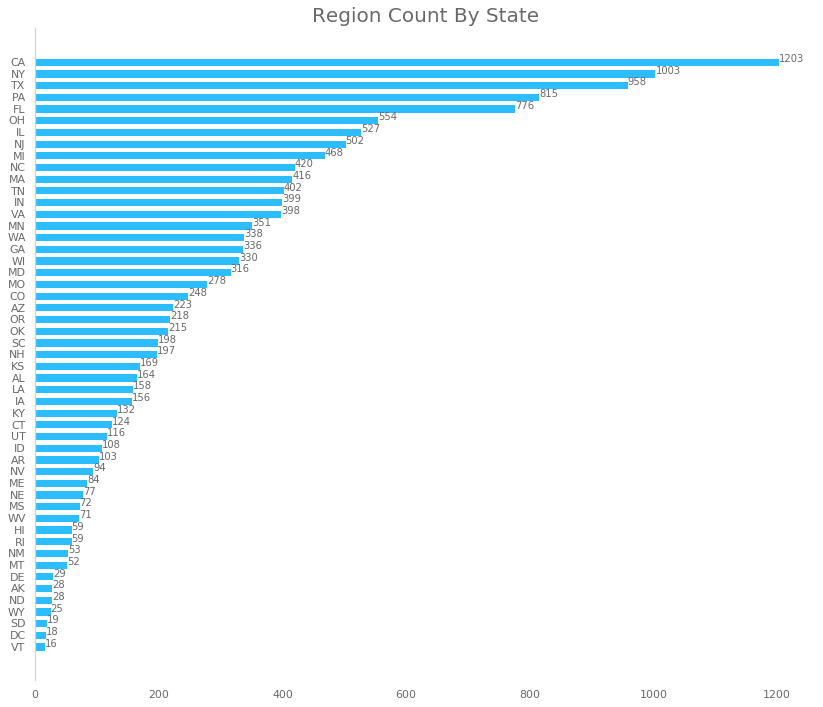

In [21]:
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values("RegionCount")
plt.barh(df_states_ordered.index,df_states_ordered['RegionCount'],height=0.7)
#matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
#y : scalar or array-like; width: scalar or array-like, width(s) of the bars.
#The y coordinates of the bars. See also align for the alignment of the bars to the coordinates.
#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html ###

sns.despine(bottom=True)  #### Without bottom line
#plt.xticks([])
#plt.ylim(0,51)
plt.title('Region Count By State')

for  i,v in enumerate(df_states_ordered['RegionCount']):   ##### i is state number, v is state count  #####
    plt.text(v,i,str((v)), fontsize=10)


In [22]:
#The same data as a map...
#state_map(kpi = 'RegionCount', grad = CB91_Grad_BP, annot=False, pacific=True)

In [23]:
#Number of regions present in each state
#df_states['RegionCount'] = df.groupby('State').count()['RegionID']

#The median and mean region value by state
df_states['18-04_median'] = df.groupby('State').median()[pd.to_datetime('2018-04', format='%Y-%m')]

df_states['18-04_mean'] = df.groupby('State').mean()[pd.to_datetime('2018-04', format='%Y-%m')]

In [24]:
df_states

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,geometry,RegionCount,18-04_median,18-04_mean
STATE_ABBR,,,,,,,,
AK,Alaska,51,02,Pacific,"MULTIPOLYGON (((-17959594.833 8086397.693, -17...",28,312100.0,323046.428571
AL,Alabama,43,01,East South Central,"POLYGON ((-9469956.571 3738149.615, -9474975.1...",164,138600.0,157269.512195
AR,Arkansas,47,05,West South Central,"POLYGON ((-10515427.373 4031238.911, -10514418...",103,132500.0,137061.165049
AZ,Arizona,37,04,Mountain,"POLYGON ((-12748377.917 3875694.650, -12752659...",223,242800.0,275735.874439
CA,California,25,06,Pacific,"MULTIPOLYGON (((-13543710.372 4576958.707, -13...",1203,566500.0,750601.330008
CO,Colorado,32,08,Mountain,"POLYGON ((-11359536.913 4502803.244, -11359264...",248,366400.0,411106.451613
CT,Connecticut,19,09,New England,"POLYGON ((-8185365.825 5061422.121, -8183891.3...",124,248100.0,285431.451613
DC,District of Columbia,28,11,South Atlantic,"POLYGON ((-8572483.584 4690023.142, -8561682.7...",18,785750.0,806166.666667
DE,Delaware,29,10,South Atlantic,"POLYGON ((-8427672.846 4631860.398, -8428077.9...",29,265700.0,303941.379310


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


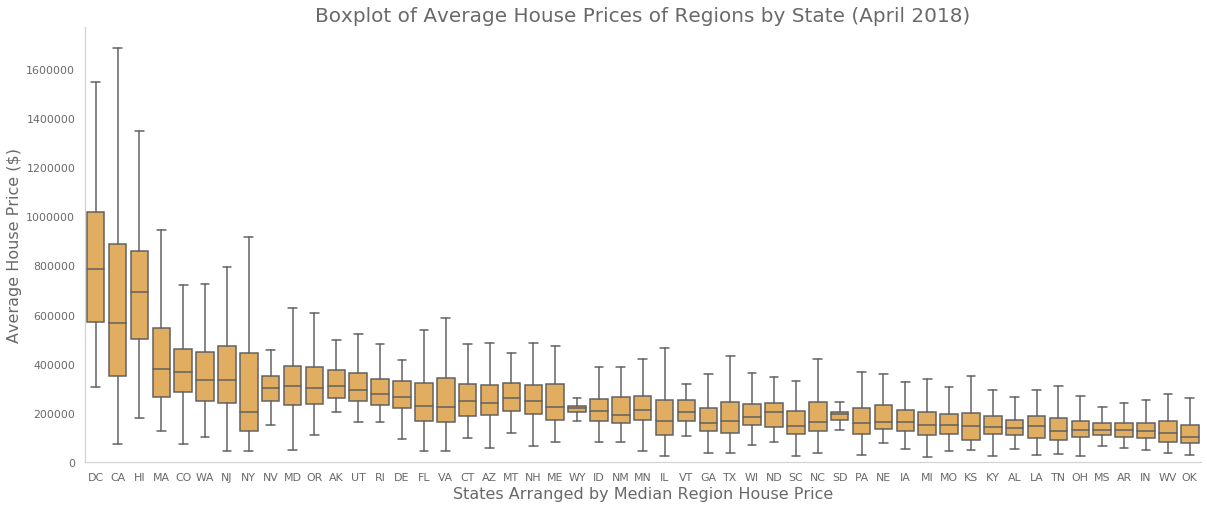

In [25]:
plt.figure(figsize=(20,8))

y = pd.to_datetime('2018-04-01', format='%Y-%m')

state_order = df_states['18-04_mean'].sort_values(ascending=False).index

sns.boxplot(x='State',y=y,data=df,order=state_order,showfliers=False, color = CB91_Amber)

plt.ylim(0,);
plt.xlabel('States Arranged by Median Region House Price')
plt.ylabel('Average House Price ($)')
plt.title('Boxplot of Average House Prices of Regions by State (April 2018)');

We sort by mean house price value in 2018-04, but the median line in each state isn't in the same order. Especially for NewYork

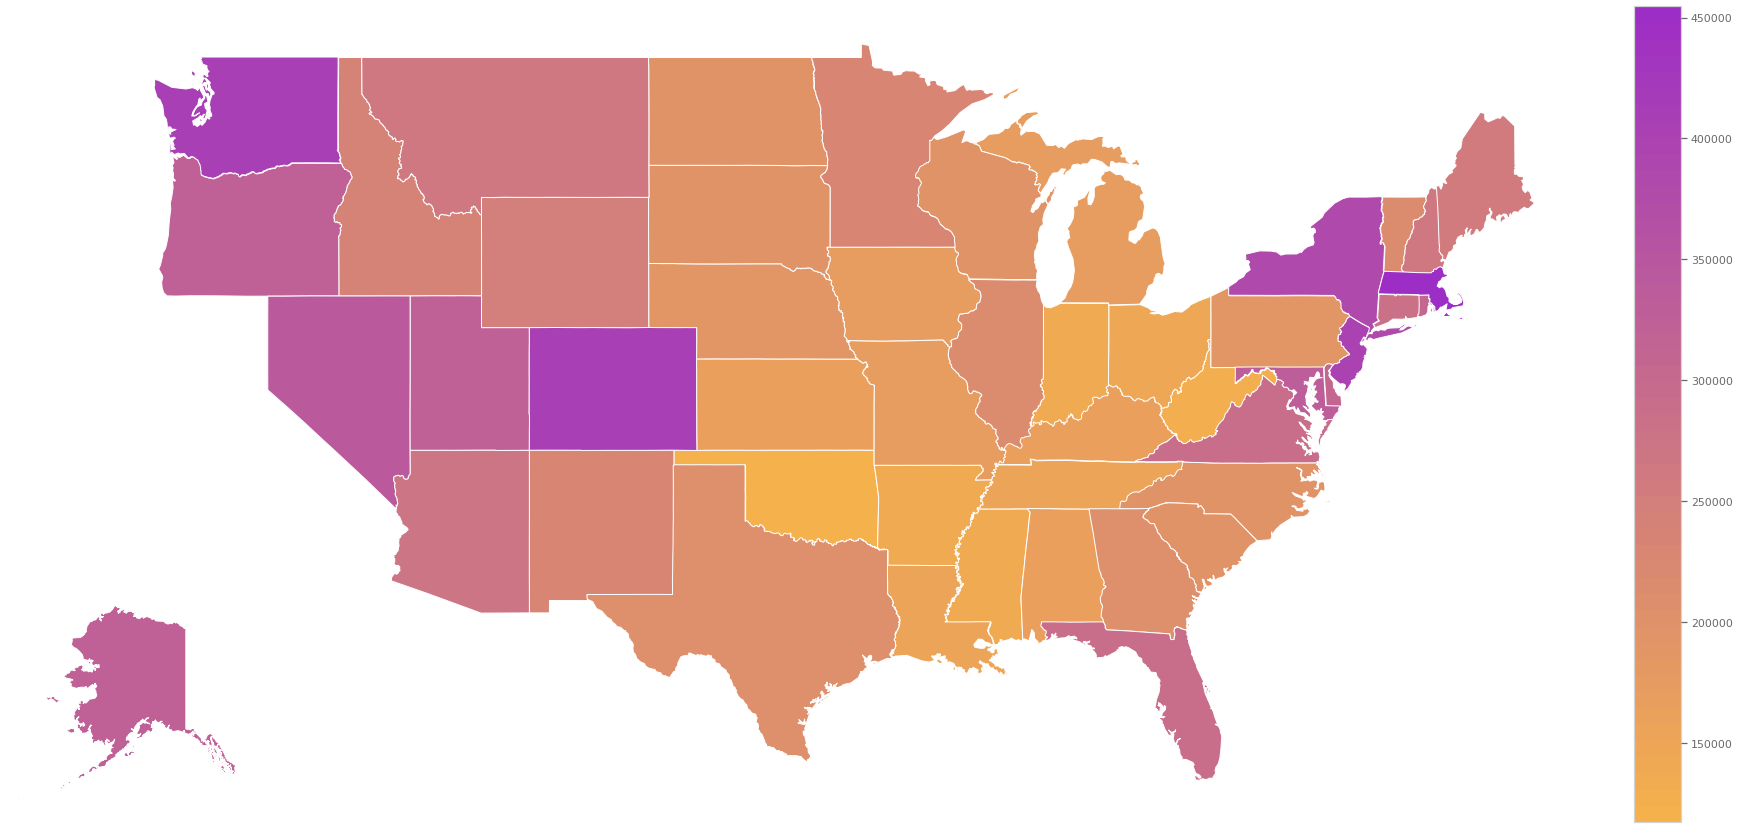

In [26]:
state_map(kpi = '18-04_mean',states = df_states.sort_values('18-04_mean').index[:-3], grad = CB91_Grad_AP, annot=False, pacific = True, dc = False)

In [27]:
#state_map(kpi = '18-04_median', grad = CB91_Grad_AP, annot=False, pacific = True, dc = False)

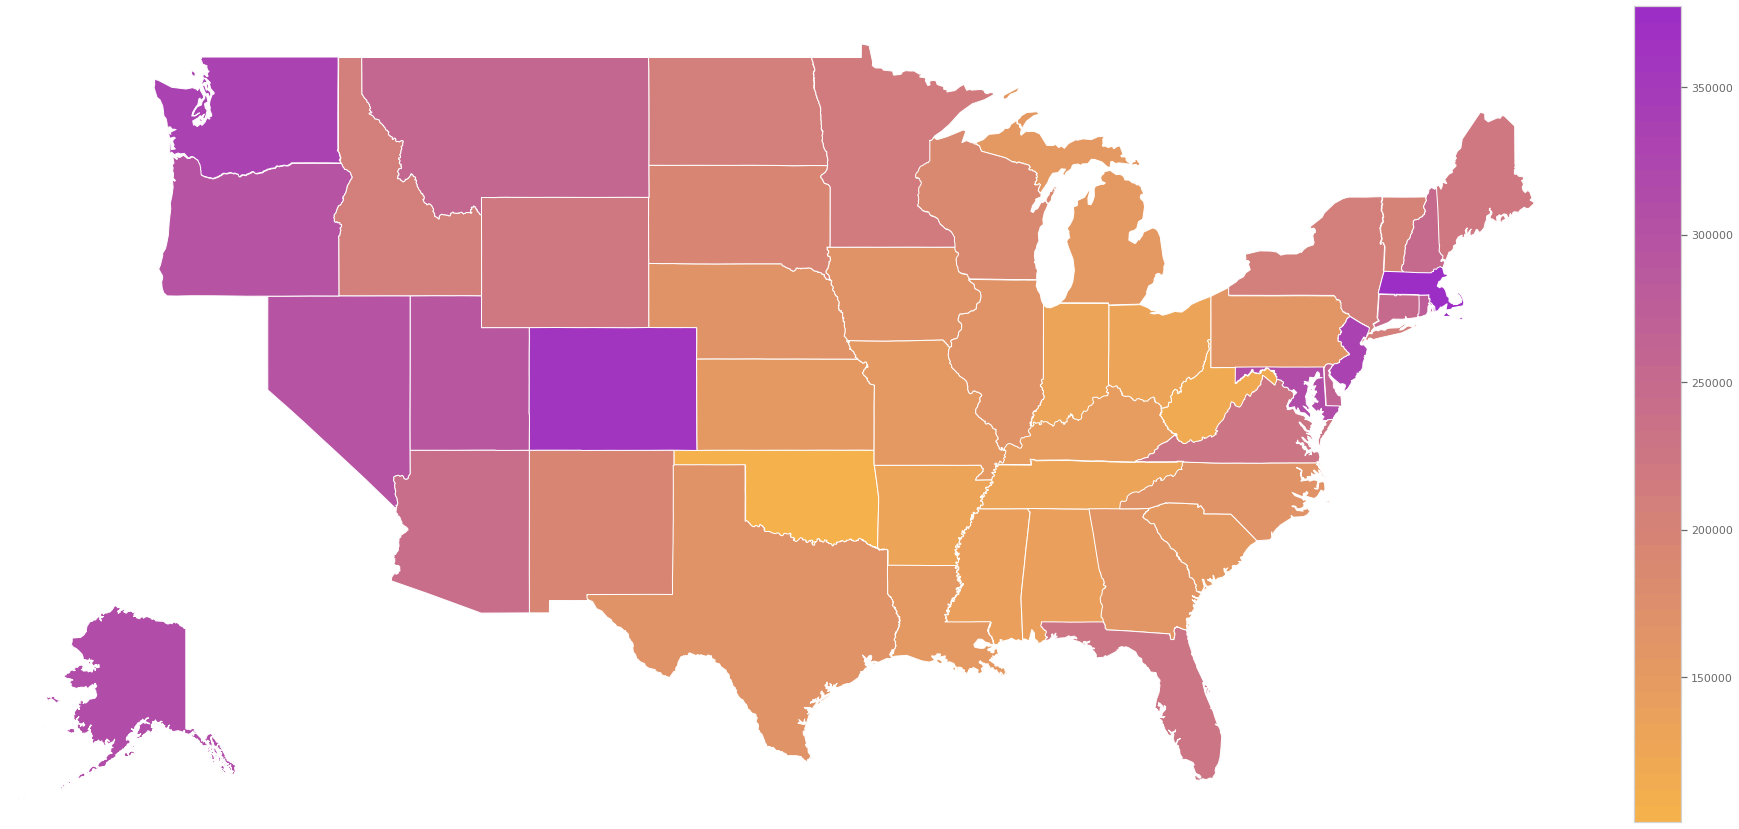

In [28]:
state_map(kpi='18-04_median',states = df_states.sort_values('18-04_median').index[:-3],grad = CB91_Grad_AP, annot=False, pacific = True, dc = True)

So there is a wide variation amongst different states - without some big outliers towards the top end, in these big outliers, California,Hawaii and D.C. have top medain and mean house price. New York also has a wide spread, though its median is almost exactly in the middle of the state distribution.

We create a new dataframe of summary statistics. The aim of this will be to visualise how the average house price has changed in the dataset (we can also have a view of different percentiles, to get a sense of spread).

In [29]:
#Create an empty dataframe...
df_sum = pd.DataFrame()

#And populate with summary statistics, quantities percentage
df_sum['Mean'] = df.mean()
df_sum['Min'] = df.min()
df_sum['05%'] = df.quantile(0.05)
df_sum['25%'] = df.quantile(0.25)
df_sum['50%'] = df.quantile(0.5)
df_sum['75%'] = df.quantile(0.75)
df_sum['95%'] = df.quantile(0.95)
df_sum['Max'] = df.max()
#### Well, we remove the non-digital columns automatically, but...
#Drop non-date rows, and reset the index
df_sum.drop(['RegionID','RegionName','SizeRank'], inplace=True)
df_sum.reset_index(inplace=True)

In [30]:
df_sum.tail()

,index,Mean,Min,05%,25%,50%,75%,95%,Max
260,2017-12-01,287190.682833,14300,76000.0,133500.0,198600.0,320700.0,758000.0,18307100
261,2018-01-01,288804.481316,14100,76210.0,134100.0,199500.0,322600.0,762090.0,18365900
262,2018-02-01,290560.306318,13900,76700.0,134700.0,200600.0,324350.0,766410.0,18530400
263,2018-03-01,292744.160817,13800,77310.0,135500.0,202400.0,326300.0,771680.0,18337700
264,2018-04-01,294301.481954,13800,77900.0,136200.0,203600.0,328000.0,776740.0,17894900


As alluded to earlier, we note that house prices were seriously affected by the subprime mortgage crisis in 2007, and the recession came after that from 2007-2010. This gives us an opportunity to assess regions against each other. First, we will look how badly they were affected after 2007, then we will see how they recovered after 2012. 

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


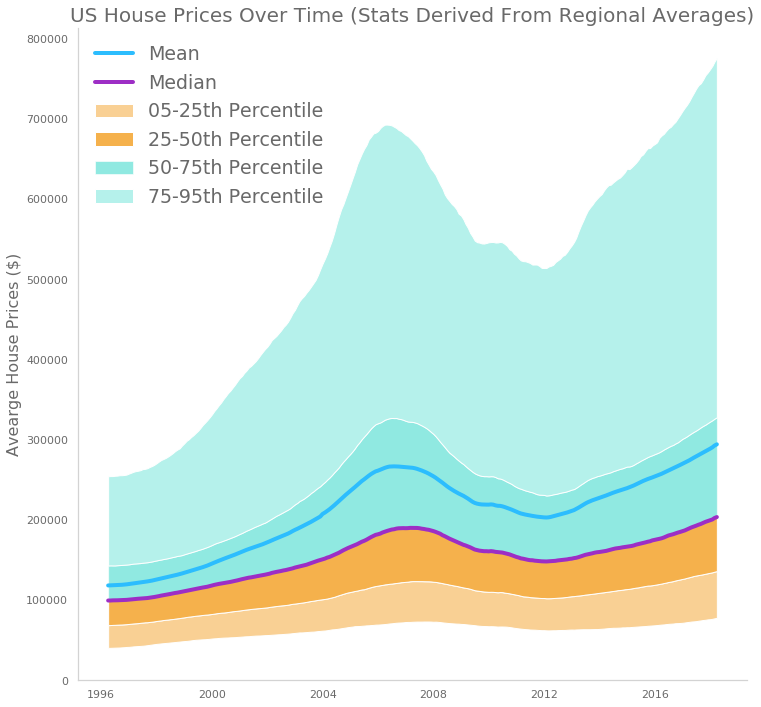

In [31]:
plt.figure(figsize=(12,12))

x = df_sum['index'].dt.to_pydatetime()

plt.plot(x, df_sum['Mean'], lw = 4,
         label = 'Mean House Price')
plt.plot(x, df_sum['50%'], lw = 4,
         label = 'Median House Price', color = CB91_Purple)

plt.fill_between(x, df_sum['05%'], df_sum['25%'],
                 facecolor=CB91_AmberL, interpolate=True)

plt.fill_between(x, df_sum['25%'], df_sum['50%'],
                 facecolor=CB91_Amber, interpolate=True)

plt.fill_between(x, df_sum['50%'], df_sum['75%'],
                 facecolor=CB91_Green, alpha = 0.6, interpolate=True)

plt.fill_between(x, df_sum['75%'], df_sum['95%'],
                 facecolor=CB91_GreenL, interpolate=True)

#plt.xticks([df_sum['index'][i] for i in range(len(df_sum)) if i%12 == 0])

#plt.xlim(df_sum['index'][0],df_sum['index'][len(df_sum)-1]);
plt.ylim(0,);

plt.title('US House Prices Over Time (Stats Derived From Regional Averages)')
plt.ylabel('Avearge House Prices ($)')

  
plt.legend(
           ['Mean','Median',
            '05-25th Percentile', '25-50th Percentile',
            '50-75th Percentile', '75-95th Percentile'],
           loc = 2,
           fontsize = 19,
           frameon=False);

# plt.legend(fontsize=12, loc=2, frameon=False);

In [32]:
#We create a new dataframe df_stats which will hold this information
################################################################
#############. Calculate increasing percentage #################
df_stats = df[list(df.columns[:7])]

#Get the prices as at the start...
Apr96 = pd.to_datetime('1996-04', format='%Y-%m')
df_stats['Apr96'] = df[Apr96]

#Get the prices as at the peak...
Apr07 = pd.to_datetime('2007-04', format='%Y-%m')
df_stats['Apr07'] = df[Apr07]

#... the trough...
Apr12 = pd.to_datetime('2012-04', format='%Y-%m')
df_stats['Apr12'] = df[Apr12]

#... and the end point
Apr18 = pd.to_datetime('2018-04', format='%Y-%m')
df_stats['Apr18'] = df[Apr18]
###### ******************************************  ###########
#Then calculate the growth rate between each of these points for each region
df_stats['96-07%'] = df_stats['Apr07'] / df_stats['Apr96'] - 1
df_stats['07-12%'] = df_stats['Apr12'] / df_stats['Apr07'] - 1
df_stats['12-18%'] = df_stats['Apr18'] / df_stats['Apr12'] - 1

df_stats.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Apr96,Apr07,Apr12,Apr18,96-07%,07-12%,12-18%
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,912000.0,740300.0,1030600,1.728905,-0.188268,0.392138
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,211000.0,201800.0,321800,-0.104794,-0.043602,0.594648
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,245100.0,252400.0,329900,0.164924,0.029784,0.307052
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,1184800.0,938100.0,1307000,1.378639,-0.208221,0.393242
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,126000.0,112800.0,121500,0.630013,-0.104762,0.077128


In [33]:

df_states['96-07%_mean'] = df_stats.groupby('State').mean()['96-07%']
df_states['07-12%_mean'] = df_stats.groupby('State').mean()['07-12%']
df_states['12-18%_mean'] = df_stats.groupby('State').mean()['12-18%']
##### GROUPBY STATE, means states as keys,then calculate the mean of all the numeric columns.   #######
##### Thus, can we plot the mean increase data by each state later.  ####
##nn = df_stats.groupby('State').mean()
##nn

In [34]:
#state_map('96-07%_mean',grad=CB91_Grad_BP,annot=False)

In [35]:
#state_map('07-12%_mean',grad=CB91_Grad_BP,annot=False)

In [36]:
#state_map('12-18%_mean',grad=CB91_Grad_BP,annot=False)

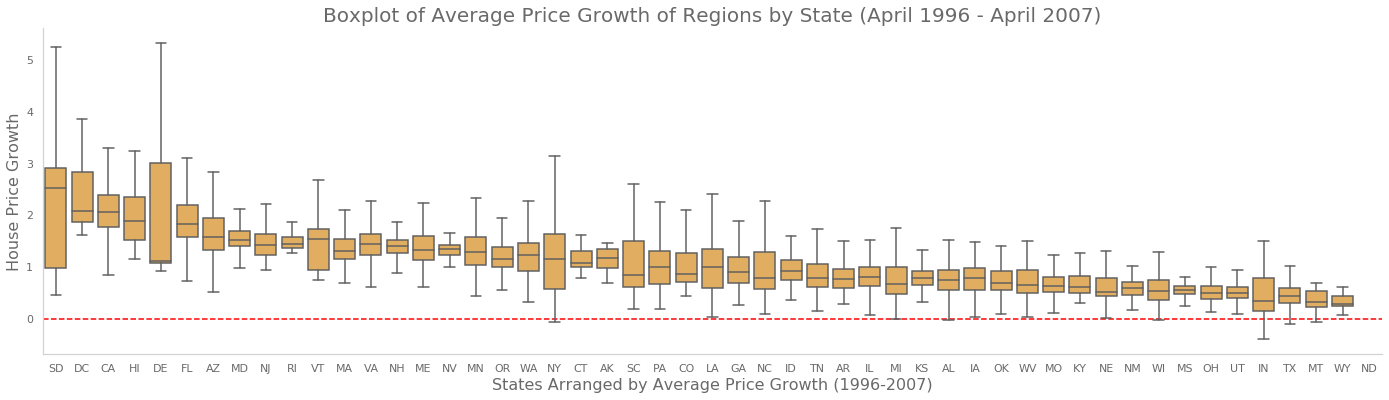

In [37]:
plt.figure(figsize=(24,6))

state_order = df_states['96-07%_mean'].sort_values(ascending=False).index

plt.axhline(0,color='red',ls="--")

sns.boxplot(x='State',y='96-07%',data=df_stats,order=state_order,showfliers=False, color = CB91_Amber)

#plt.ylim();
plt.xlabel('States Arranged by Average Price Growth (1996-2007)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State (April 1996 - April 2007)');

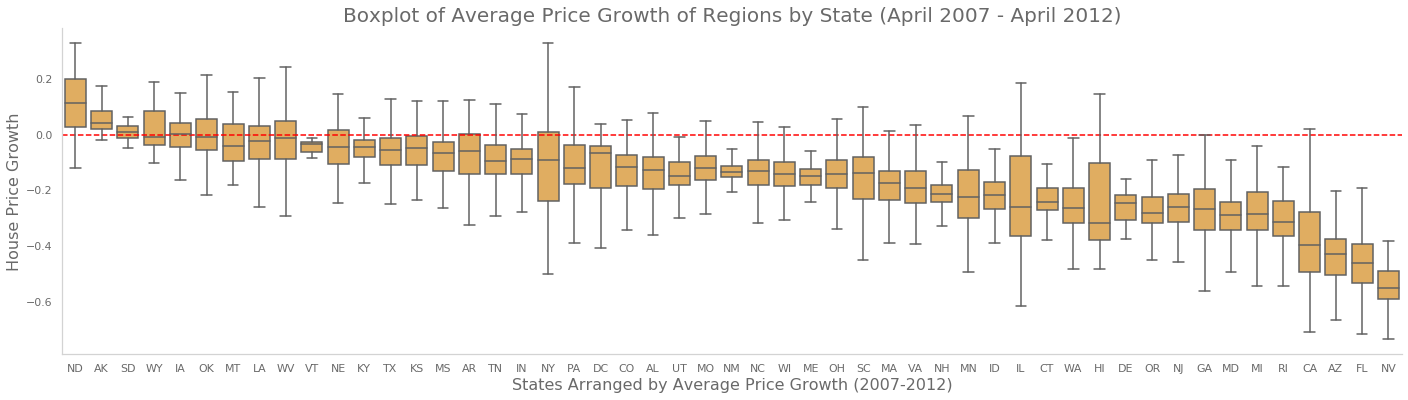

In [38]:
plt.figure(figsize=(24,6))

state_order = df_states['07-12%_mean'].sort_values(ascending=False).index

plt.axhline(0,color='red',ls="--")

sns.boxplot(x='State',y='07-12%',data=df_stats,order=state_order,showfliers=False, color = CB91_Amber)

#plt.ylim();
plt.xlabel('States Arranged by Average Price Growth (2007-2012)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State (April 2007 - April 2012)');

Text(0.5, 1.0, 'Boxplot of Average Price Growth of Regions by State (April 2012 - April 2018)')

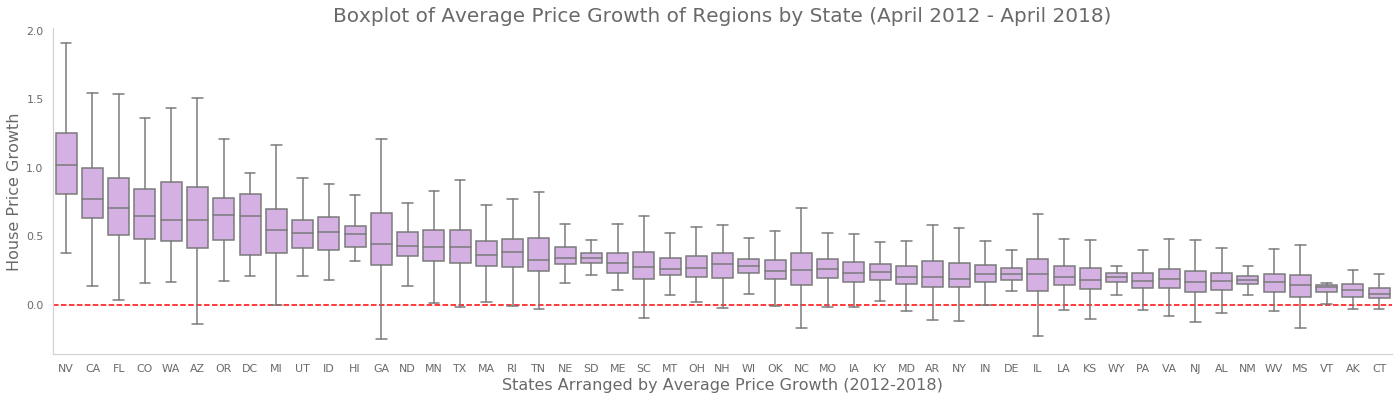

In [39]:
plt.figure(figsize=(24,6))
state_order = df_states['12-18%_mean'].sort_values(ascending=False).index
plt.axhline(0,color='red',ls='--')
sns.boxplot(x='State',y='12-18%',data=df_stats, order=state_order,showfliers=False, color = CB91_PurpleL)

plt.xlabel('States Arranged by Average Price Growth (2012-2018)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State (April 2012 - April 2018)')

So the inter-quartile range for most states is actually quite tight(certainly more so when considering the last six years) though most states have some strong outliers either way.



## Data for population changes 

In [40]:
dfc_ = pd.read_csv('Data/nst-est-popchg2010_2019.csv')

dfc = dfc_.iloc[5:]   
cc = dfc.reset_index()
dfc = cc.drop('index',axis = 1)

####### Remove the region    https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
dfc_region = dfc_.iloc[:5]

In [41]:
dfc_stats = dfc[list(dfc.columns[:16])]
dfc_stats = dfc_stats.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2010','STATE'])
dfc_stats['Incresement%'] = dfc_stats['POPESTIMATE2019'] / dfc_stats['POPESTIMATE2010'] - 1
#dfc_stats['Incresement%'] 
#region = dfc_stats.head()

In [42]:
dfc_R = dfc_region[list(dfc_region.columns[:16])]
dfc_R = dfc_R.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2010','STATE'])
dfc_R['Incresement%'] = dfc_R['POPESTIMATE2019'] / dfc_R['POPESTIMATE2010'] - 1
region = dfc_R.head()

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


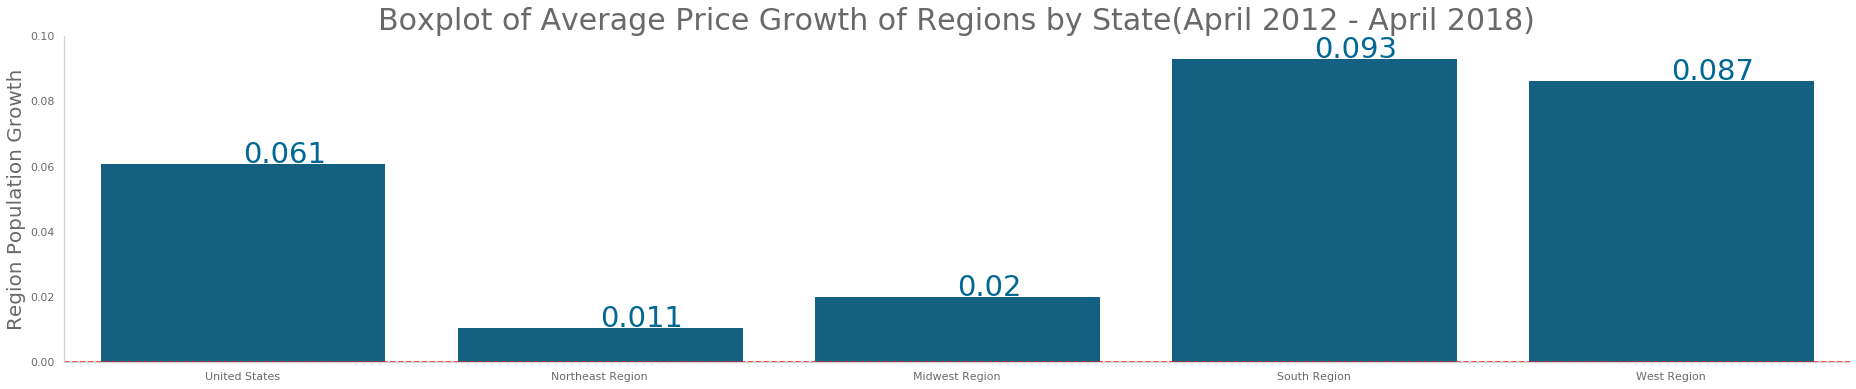

In [43]:
plt.figure(figsize=(32,6))
#change_order = dfc_stats['Incresement%'].sort_values(ascending=False)
plt.axhline(0,color='red',ls='--')
sns.barplot(x='NAME',y='Incresement%',data=dfc_R, color = CB91_BlueD)

plt.ylim(0,0.1)
plt.xlabel('',fontsize = 20)
#plt.xlabel('States Arranged by Average Price Growth (2012-2018)')
plt.ylabel('Region Population Growth',fontsize = 20)
plt.title('Boxplot of Average Price Growth of Regions by State(April 2012 - April 2018)', fontsize = 30)
for i, v in enumerate(region['Incresement%']):
    plt.text(i, v, f'{str(round(v,3))}', fontsize = 29,color = CB91_BlueD)   ###### position of v and i here

Text(0.5, 1.0, 'Barplot of Population Growth of Regions by State(2010 - 2019)')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


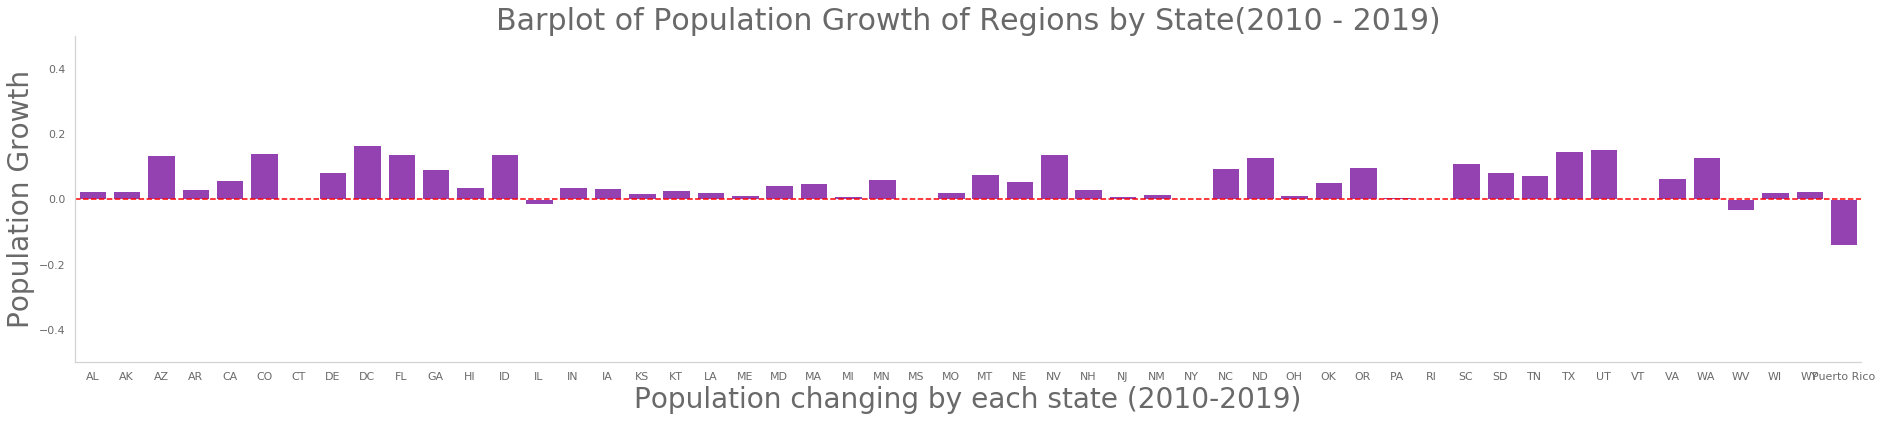

In [44]:
plt.figure(figsize=(32,6))
#change_order = dfc_stats['Incresement%'].sort_values(ascending=False)
plt.axhline(0,color='red',ls='--')
sns.barplot(x='NAME',y='Incresement%',data=dfc_stats, color = CB91_Purple)
#sns.set(font_scale=1.5)

plt.ylim(-0.5,0.5)
plt.xlabel('Population changing by each state (2010-2019)',fontsize=28)
plt.ylabel('Population Growth',fontsize=28)
plt.title('Barplot of Population Growth of Regions by State(2010 - 2019)',fontsize = 30)


In [45]:
'''
tmp = dfc_stats[5:60]
#tmp_stats.set_index("NAME", inplace = True)
tmp.head()
#tmp_stats.loc['Iowa']['Incresement%']
#df_temp = df_temp.dropna()
#tmp_stats['Incresement%']
states = list(tmp.index)
'''

'\ntmp = dfc_stats[5:60]\n#tmp_stats.set_index("NAME", inplace = True)\ntmp.head()\n#tmp_stats.loc[\'Iowa\'][\'Incresement%\']\n#df_temp = df_temp.dropna()\n#tmp_stats[\'Incresement%\']\nstates = list(tmp.index)\n'

In [46]:
#dfc_stats[0:51]

In [47]:
#################### Population increase
tmp_stats = dfc_stats[0:51]
tmp_stats = tmp_stats.sort_values('NAME')
df_states['Incresement%'] = list(tmp_stats['Incresement%'])



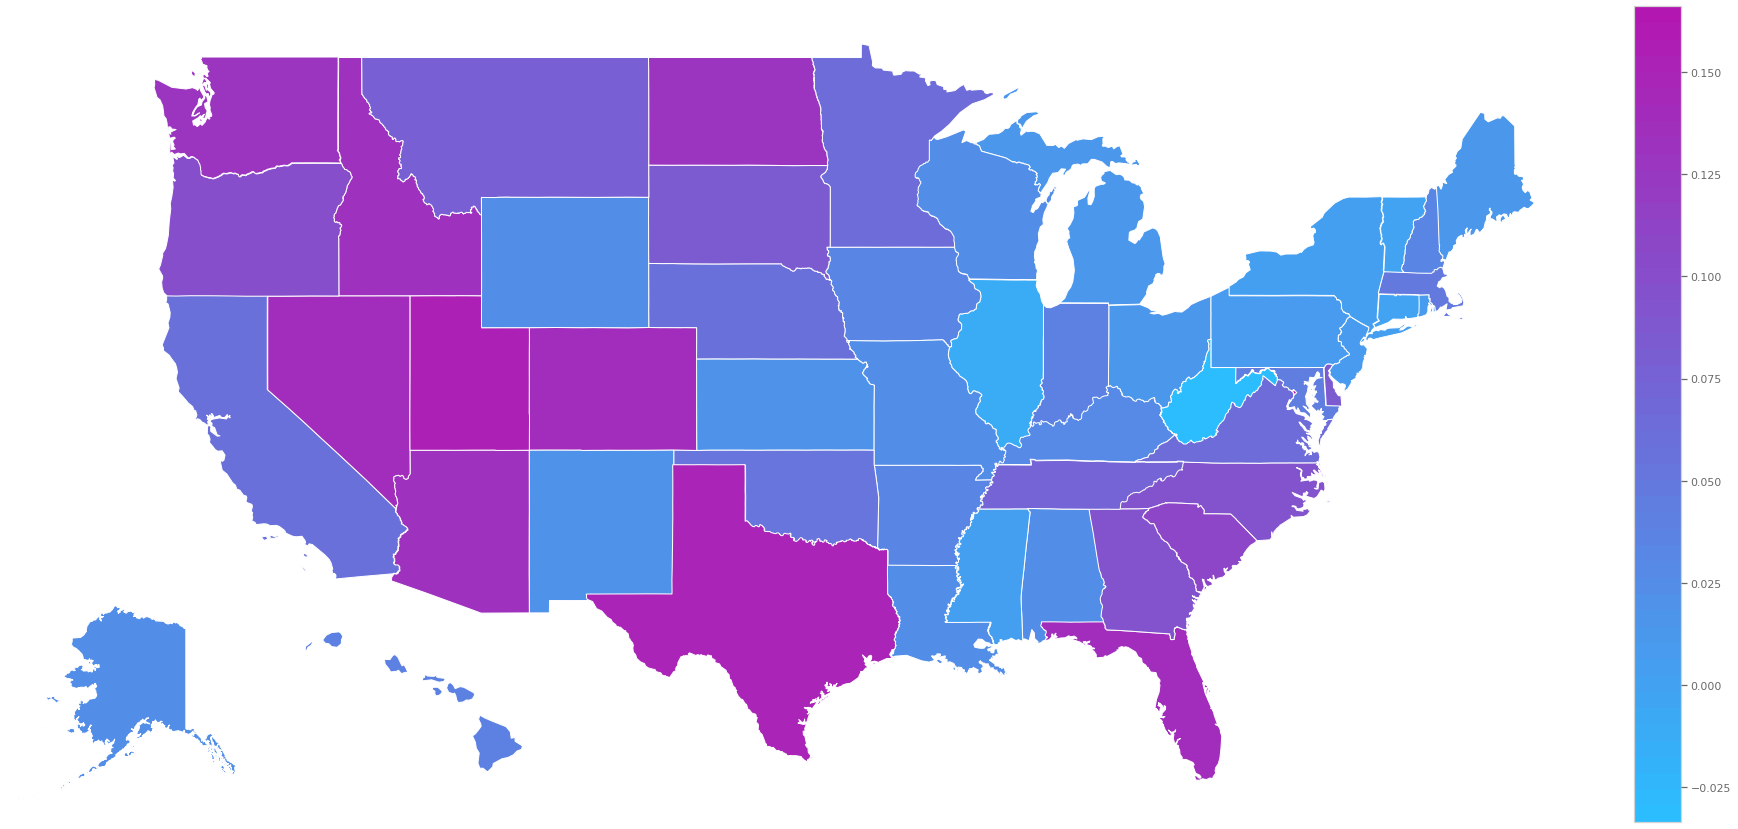

In [48]:
state_map('Incresement%',grad=CB91_Grad_BP,annot=False)

In [49]:
#Initiate an empty list for the regionIDs with extreme growth
extreme_codes = []

#Find the regions that had the biggest growth in each time period
extreme_codes.append(df_stats.sort_values('96-07%').dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values('07-12%').dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values('12-18%').dropna().iloc[0]['RegionID'])

#And the regions that had the biggest falls
extreme_codes.append(df_stats.sort_values('96-07%', ascending = False).dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values('07-12%', ascending = False).dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values('12-18%', ascending = False).dropna().iloc[0]['RegionID'])

#Create a dataframe that looks at these regions
df_extreme = df.loc[df['RegionID'].isin(extreme_codes)]

#Create a new column of county name, state name, which we'll use as an index
df_extreme['Index'] = df_extreme["CountyName"].map(lambda x: f'{str(x)}, ') + df_extreme["State"]
#f keep the county name

df_extreme.set_index('Index', inplace=True)

#Transpose to create line plots, then we can plot all the timelines
df_extreme = df_extreme.iloc[:,8:].T

In [50]:
df_extreme

Index,"Alameda, CA","Travis, TX","Wayne, MI","Cambria, PA","Sussex, DE","Northumberland, PA"
1996-05-01,114500.0,765800.0,68200.0,43200.0,34900.0,39300.0
1996-06-01,114500.0,760200.0,68500.0,43300.0,35200.0,39500.0
1996-07-01,114400.0,755200.0,68800.0,43400.0,35700.0,39600.0
1996-08-01,114400.0,751100.0,69200.0,43600.0,36100.0,39700.0
1996-09-01,114400.0,747800.0,69500.0,43800.0,36500.0,39800.0
...,...,...,...,...,...,...
2017-12-01,535800.0,473200.0,71000.0,27600.0,269300.0,125500.0
2018-01-01,546900.0,473500.0,72300.0,27600.0,272100.0,126600.0
2018-02-01,555000.0,475500.0,73500.0,27700.0,275300.0,127600.0
2018-03-01,562000.0,479300.0,75300.0,28300.0,277000.0,128400.0


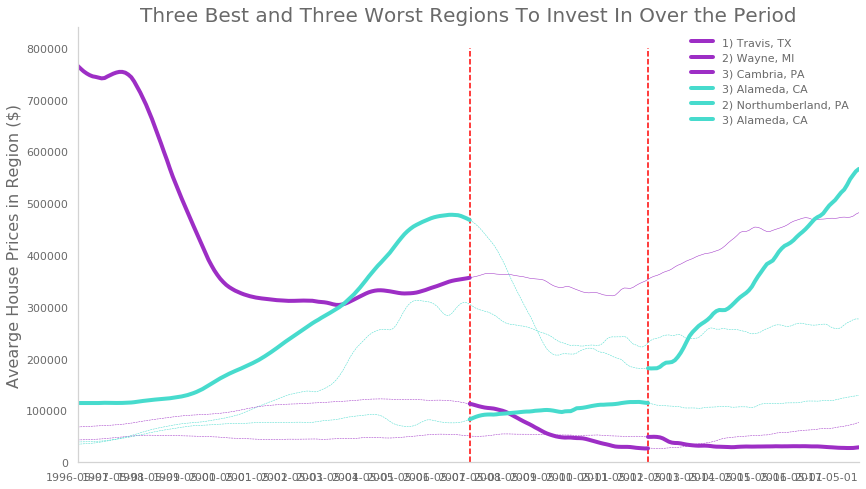

In [51]:
#Now plot the regions' prices over time...
plt.figure(figsize=(14,8))
#When a csv file is imported and a Data Frame is made, 
#the Date time objects in the file are read as a string object 
#rather a Date Time object and Hence it’s very tough to 
#perform operations like Time difference on a string rather a Date Time object. 
#Pandas to_datetime() method helps to convert string Date time into Python Date time object.
x = pd.to_datetime(df_extreme.index)
x1 = pd.to_datetime(df_extreme.index[:133])
x2 = pd.to_datetime(df_extreme.index[132:193])
x3 = pd.to_datetime(df_extreme.index[192:])

plt.plot(x, df_extreme['Travis, TX'], color = CB91_Purple, lw = 0.5,  label = '')
plt.plot(x, df_extreme['Cambria, PA'], color = CB91_Purple, lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Sussex, DE'], color = CB91_Green, lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Northumberland, PA'], color = CB91_Green, lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Alameda, CA'], color = CB91_Green, lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Wayne, MI'], color = CB91_Purple, lw = 0.5, ls = '--', label = '')


plt.plot(x1, df_extreme['Travis, TX'][x1], color = CB91_Purple, lw = 4, label = '1) Travis, TX')
plt.plot(x2, df_extreme['Wayne, MI'][x2], color = CB91_Purple, lw = 4, label = '2) Wayne, MI')
plt.plot(x3, df_extreme['Cambria, PA'][x3], color = CB91_Purple, lw = 4, label = '3) Cambria, PA')
plt.plot(x1, df_extreme['Alameda, CA'][x1], color = CB91_Green, lw = 4, label = '3) Alameda, CA')
plt.plot(x2, df_extreme['Northumberland, PA'][x2], color = CB91_Green, lw = 4, label = '2) Northumberland, PA')
plt.plot(x3, df_extreme['Alameda, CA'][x3], color = CB91_Green, lw = 4, label = '3) Alameda, CA')



plt.vlines([x1[0],x2[0],x3[0]],0,800000,color='red',linestyles='dashed')
plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])
plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.legend(frameon=False)##### No frame line for legend

plt.title('Three Best and Three Worst Regions To Invest In Over the Period');
plt.ylabel('Avearge House Prices in Region ($)');

Let's suppose we'd had $100,000 to invest in property in 1996, then had the chance to sell at two points, once at the peak in 2007, and again at the trough in 2012. What is the most money we could have made? Similarly, what's the most we could have lost?

In [52]:
CHI = df.loc[(df['City'] == 'Chicago') & (df['State'] == 'IL')]
LA = df.loc[(df['City'] == 'Los Angeles') & (df['State'] == 'CA')]
HOU = df.loc[(df['City'] == 'Houston') & (df['State'] == 'TX')]
NYC = df.loc[(df['City'] == 'New York') & (df['State'] == 'NY')]
PHX = df.loc[(df['City'] == 'Phoenix') & (df['State'] == 'AZ')]
PHI = df.loc[(df['City'] == 'Philadelphia') & (df['State'] == 'PA')]
ATL = df.loc[(df['City'] == 'Atlanta') & (df['State'] == 'GA')]
SF = df.loc[(df['City'] == 'San Francisco') & (df['State'] == 'CA')]
DAL = df.loc[(df['City'] == 'Dallas') & (df['State'] == 'TX')]
MIA = df.loc[(df['City'] == 'Miami') & (df['State'] == 'FL')]


################.    We find mean price for one city.      #################
CHI_mean = CHI.groupby(['State','City']).mean()
LA_mean = LA.groupby(['State','City']).mean()
HOU_mean = HOU.groupby(['State','City']).mean()
NYC_mean = NYC.groupby(['State','City']).mean()
PHX_mean = PHX.groupby(['State','City']).mean()
ATL_mean = ATL.groupby(['State','City']).mean()
PHI_mean = PHI.groupby(['State','City']).mean()
SF_mean = SF.groupby(['State','City']).mean()
DAL_mean = DAL.groupby(['State','City']).mean()
MIA_mean = MIA.groupby(['State','City']).mean()


In [106]:
NYC_ = NYC.reset_index()
set(NYC_['CountyName'])

{'Bronx', 'Kings', 'New York', 'Queens', 'Richmond'}

In [53]:
ASD = pd.concat([CHI_mean,LA_mean,HOU_mean,NYC_mean,PHX_mean,ATL_mean,PHI_mean,SF_mean,DAL_mean,MIA_mean], axis=0)

ASD.reset_index(inplace=True)
#ATL_mean = ATL_mean.rename(columns = {'index':'Atlanta,GA'})
ASD.index = ASD["City"] +','+ ASD["State"]
ASD = ASD.iloc[:,6:].T
ASD

,"Chicago,IL","Los Angeles,CA","Houston,TX","New York,NY","Phoenix,AZ","Atlanta,GA","Philadelphia,PA","San Francisco,CA","Dallas,TX","Miami,FL"
1996-05-01,177220.0,2.238333e+05,163151.162791,2.152337e+05,115929.411765,198000.000000,77551.428571,3.960789e+05,181121.875,130155.555556
1996-06-01,177500.0,2.238731e+05,163390.697674,2.156981e+05,116670.588235,199033.333333,77542.857143,3.976737e+05,181084.375,130088.888889
1996-07-01,177560.0,2.238989e+05,163667.441860,2.161865e+05,117402.941176,200083.333333,77500.000000,3.994105e+05,181125.000,130000.000000
1996-08-01,177435.0,2.239667e+05,163972.093023,2.167202e+05,118102.941176,201183.333333,77454.285714,4.012526e+05,181275.000,129955.555556
1996-09-01,177100.0,2.241247e+05,164309.302326,2.173125e+05,118770.588235,202350.000000,77411.428571,4.033368e+05,181525.000,129922.222222
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,448857.5,1.012359e+06,259626.744186,1.187824e+06,314985.294118,580416.666667,249265.714286,2.103574e+06,343387.500,490511.111111
2018-01-01,450495.0,1.020692e+06,260373.255814,1.193012e+06,316794.117647,585775.000000,250780.000000,2.111747e+06,344559.375,493611.111111
2018-02-01,452142.5,1.028884e+06,261856.976744,1.196839e+06,318538.235294,590216.666667,252420.000000,2.120553e+06,347015.625,496277.777778
2018-03-01,452735.0,1.036853e+06,264155.813953,1.198353e+06,320691.176471,595633.333333,254737.142857,2.134005e+06,350293.750,499000.000000


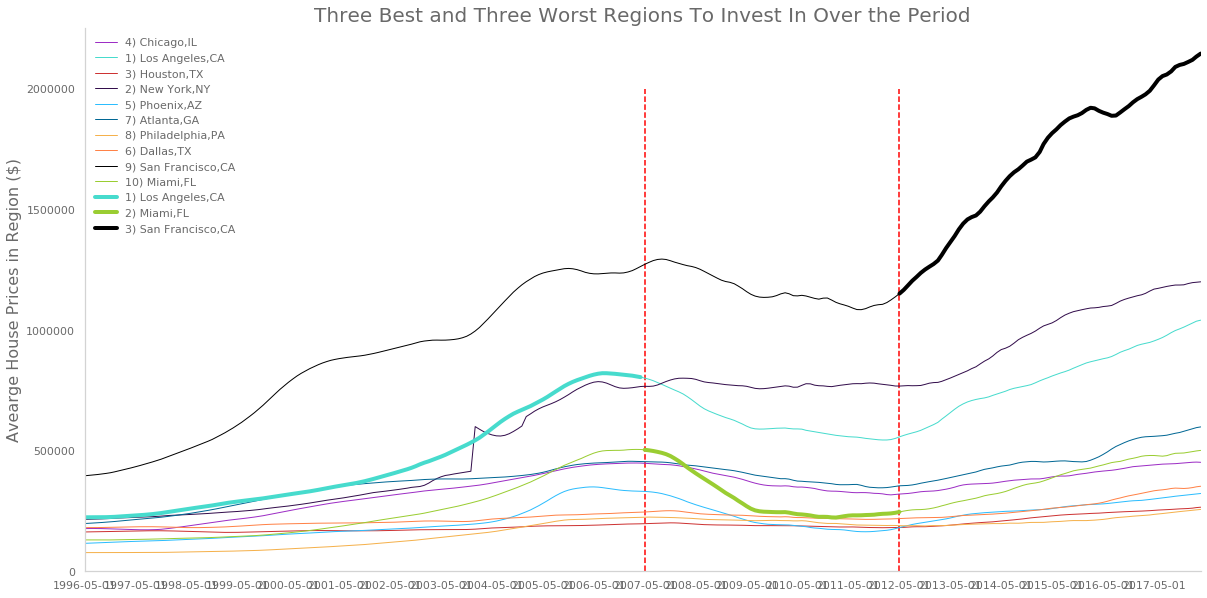

In [54]:
plt.figure(figsize=(20,10))

x = pd.to_datetime(ASD.index)
x1 = pd.to_datetime(ASD.index[:132])
x2 = pd.to_datetime(ASD.index[132:193])
x3 = pd.to_datetime(ASD.index[192:])
######## x must have same length with ASD rows.  ########
plt.plot(x, ASD['Chicago,IL'], color = CB91_Purple,
         lw = 1,  label = '4) Chicago,IL')
plt.plot(x, ASD['Los Angeles,CA'], color = CB91_Green,
         lw = 1,  label = '1) Los Angeles,CA')
plt.plot(x, ASD['Houston,TX'], color = CB91_Crimson,
         lw = 1,  label = '3) Houston,TX')
plt.plot(x, ASD['New York,NY'], color = CB91_VioletD,
         lw = 1,  label = '2) New York,NY')
plt.plot(x, ASD['Phoenix,AZ'], color = CB91_Blue,
         lw = 1,  label = '5) Phoenix,AZ')
plt.plot(x, ASD['Atlanta,GA'], color = CB91_BlueD,
         lw = 1,  label = '7) Atlanta,GA')
plt.plot(x, ASD['Philadelphia,PA'], color = CB91_Amber,
         lw = 1,  label = '8) Philadelphia,PA')
plt.plot(x, ASD['Dallas,TX'], color = CB91_Orange,
         lw = 1,  label = '6) Dallas,TX')
plt.plot(x, ASD['San Francisco,CA'], color = CB91_Black,
         lw = 1,  label = '9) San Francisco,CA')
plt.plot(x, ASD['Miami,FL'], color = CB91_Oliver,
         lw = 1,  label = '10) Miami,FL')


plt.plot(x1, ASD['Los Angeles,CA'][x1], color = CB91_Green,
         lw = 4, label = '1) Los Angeles,CA')
plt.plot(x2, ASD['Miami,FL'][x2],color = CB91_Oliver,lw=4,label='2) Miami,FL')
plt.plot(x3, ASD['San Francisco,CA'][x3],color = CB91_Black,lw=4,label='3) San Francisco,CA')

plt.vlines([x1[0],x2[0],x3[0]],0,2000000,color='red',linestyles='dashed')
plt.xticks([x[i] for i in range(len(ASD)) if i%12 ==0])
#plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])
plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.legend(frameon=False)##### No frame line for legend

plt.title('Three Best and Three Worst Regions To Invest In Over the Period');
plt.ylabel('Avearge House Prices in Region ($)');

In [55]:
df_stats

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Apr96,Apr07,Apr12,Apr18,96-07%,07-12%,12-18%
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,912000.0,740300.0,1030600,1.728905,-0.188268,0.392138
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,211000.0,201800.0,321800,-0.104794,-0.043602,0.594648
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,245100.0,252400.0,329900,0.164924,0.029784,0.307052
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,1184800.0,938100.0,1307000,1.378639,-0.208221,0.393242
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,126000.0,112800.0,121500,0.630013,-0.104762,0.077128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,205000.0,175400.0,209300,1.167019,-0.144390,0.193273
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,224600.0,184700.0,225800,1.422869,-0.177649,0.222523
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,113300.0,109600.0,133400,0.984238,-0.032657,0.217153
14721,93733,81225,Mount Crested Butte,CO,Not known,Gunnison,14722,191100.0,637700.0,503700.0,664400,2.336996,-0.210130,0.319039


Text(0, 0.5, 'Resiliance - (% Growth Between 2007-2012)')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


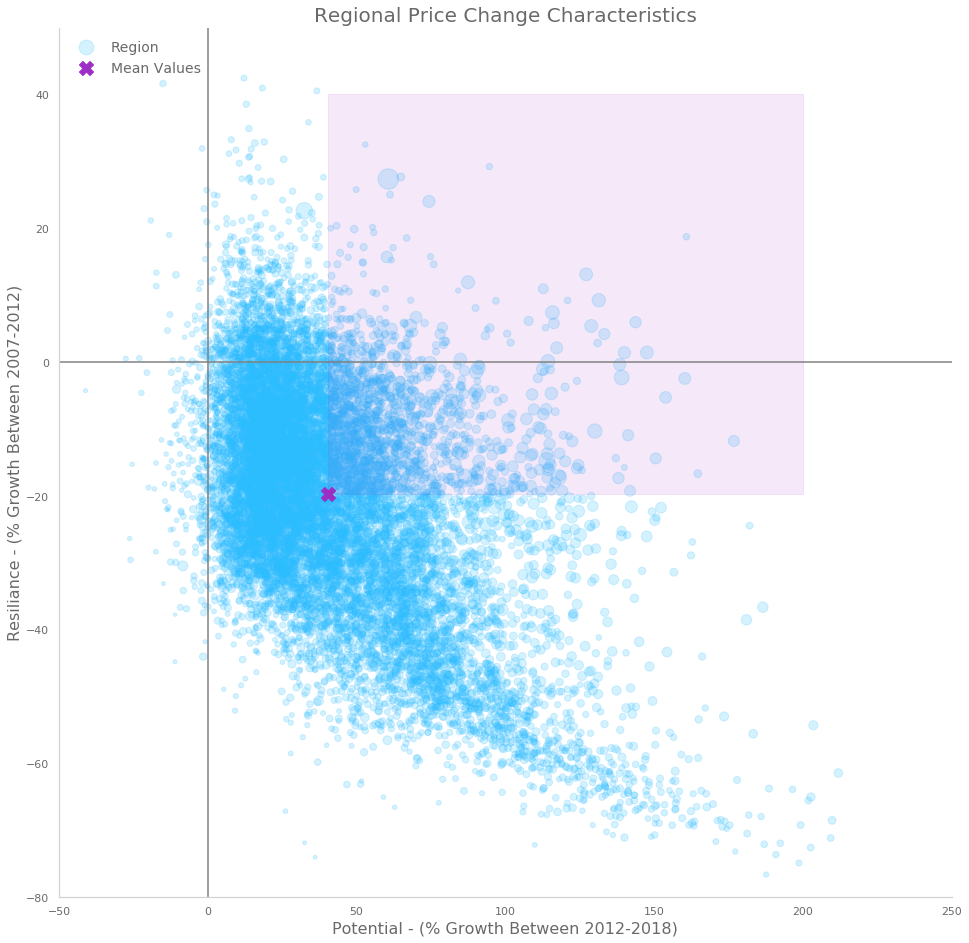

In [56]:
#translate the current house price values
#this will be used to size the points on the scatter, or the plot is too big
trans_values = np.sqrt(df_stats['Apr18'])/10

#calculate the average x and y values
avg_res = df_stats['07-12%'].mean()
avg_pot = df_stats['12-18%'].mean()

plt.figure(figsize=(16,16))

#plot the scatter
plt.scatter(df_stats['12-18%'] * 100, df_stats['07-12%'] * 100,
            s=trans_values, alpha=0.2, label='Region');

#and plot a point showing the average
plt.scatter(avg_pot * 100, avg_res * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

#shade the region that is above both averages
plt.fill_between([avg_pot*100, 200], [avg_res*100, avg_res*100], [40,40],
        color=CB91_Purple, alpha=0.1)

plt.axhline(0,color='grey')
plt.axvline(0,color='grey')

plt.ylim(-80,50)
plt.xlim(-50,250)
plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Regional Price Change Characteristics')
plt.xlabel('Potential - (% Growth Between 2012-2018)')
plt.ylabel('Resiliance - (% Growth Between 2007-2012)')

We can also visualize the region picture on a scatter, showing the growth since the recession on the x axis, and the fall during the recession on the y axis, we should consider focusing our analysis on regions that score well on each measure.

Here, we define the growth regions as 1, otherwise as 0 

In [57]:
df_stats_growth = df_stats.loc[(df_stats['07-12%']>avg_res) &
                               (df_stats['12-18%']>avg_pot)]
growth_regions = list(df_stats_growth['RegionID'])

#Add a column to the original dataframe to see
#if the region is in the growth group or not
df['GrowthRegion'] = df['RegionID'].map(lambda x: 1 if x in growth_regions else 0)

cols = list(df.columns)
df = df[cols[:7] + [cols[-1]] + cols[7:-1]]   ###### Remove the last column
###########. df[cols[7:272]] == df[cols[7:-1]]

In [58]:
cols[:7] + [cols[-1]] + cols[7:-1]
cols[:7] + [cols[-1]] 

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 'GrowthRegion']

In [59]:

def indexed_time_series(start,df=df,drop_na=True):
    
    '''
    Takes a point in time 'start', and returns a dataframe
    that indexes all house prices to this start time (which is indexed to 100) 
    '''
    start = pd.to_datetime(start, format='%Y-%m') #### We need to do this cause we need to calculate division
    new_df = df[['RegionID','State','GrowthRegion']]
    for i in df.columns[8:]:
        new_df[i] = 100 *(df[i] / df[start])
        #print(new_df[i])
    #If drop_na is true, then drop all regions with any NAs
    if drop_na:
        new_df = new_df.dropna()
    
    return new_df

In [60]:
df.columns[9]

Timestamp('1996-05-01 00:00:00')

In [61]:
#df_07_indexed = indexed_time_series('2007-04')

#df_sum['Growth_Index'] = list(df_07_indexed.loc[df_07_indexed['RegionID'].isin(growth_regions)].median()[2:])

#df_sum['Non_Growth_Index'] = list(df_07_indexed.loc[~df_07_indexed['RegionID'].isin(growth_regions)].median()[2:])

In [62]:
df_sum

,index,Mean,Min,05%,25%,50%,75%,95%,Max
0,1996-04-01,118299.123063,11300,40400.0,68800.0,99500.0,143200.0,254500.0,3.6767e+06
1,1996-05-01,118419.044139,11500,40500.0,68900.0,99500.0,143300.0,254700.0,3.7042e+06
2,1996-06-01,118537.423268,11600,40600.0,69100.0,99700.0,143225.0,254700.0,3.7296e+06
3,1996-07-01,118653.069278,11800,40700.0,69200.0,99700.0,143225.0,255100.0,3.7546e+06
4,1996-08-01,118780.254312,11800,40800.0,69375.0,99800.0,143500.0,255300.0,3.7818e+06
...,...,...,...,...,...,...,...,...,...
260,2017-12-01,287190.682833,14300,76000.0,133500.0,198600.0,320700.0,758000.0,18307100
261,2018-01-01,288804.481316,14100,76210.0,134100.0,199500.0,322600.0,762090.0,18365900
262,2018-02-01,290560.306318,13900,76700.0,134700.0,200600.0,324350.0,766410.0,18530400
263,2018-03-01,292744.160817,13800,77310.0,135500.0,202400.0,326300.0,771680.0,18337700


In [63]:
'''
plt.figure(figsize=(12,6))

x = df_sum['index']

plt.plot(x, df_sum['Growth_Index'], lw = 2,
         label = 'Growth Regions - Median House Price')

plt.plot(x, df_sum['Non_Growth_Index'], lw = 2,
         label = 'Other Regions - Median House Price')

plt.axhline(100,color='red',ls="--")

plt.legend(fontsize=12, loc=2, frameon=False);

plt.title('US House Prices Over Time (April 2007 Indexed to 100)')
plt.ylabel("Avearge House Prices");

plt.xlim();
'''

'\nplt.figure(figsize=(12,6))\n\nx = df_sum[\'index\']\n\nplt.plot(x, df_sum[\'Growth_Index\'], lw = 2,\n         label = \'Growth Regions - Median House Price\')\n\nplt.plot(x, df_sum[\'Non_Growth_Index\'], lw = 2,\n         label = \'Other Regions - Median House Price\')\n\nplt.axhline(100,color=\'red\',ls="--")\n\nplt.legend(fontsize=12, loc=2, frameon=False);\n\nplt.title(\'US House Prices Over Time (April 2007 Indexed to 100)\')\nplt.ylabel("Avearge House Prices");\n\nplt.xlim();\n'

In [64]:
df_rise = df.loc[df['GrowthRegion']==1]
df_fall = df.loc[df['GrowthRegion']==0]
df_fall

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,GrowthRegion,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,84654,60657,Chicago,IL,Chicago,Cook,1,0,334200.0,335400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
2,91982,77494,Katy,TX,Houston,Harris,3,0,210400.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,0,498100.0,500900.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
6,61807,10467,New York,NY,New York,Bronx,7,0,152900.0,152700.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,0,94600.0,94300.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,0,92700.0,92500.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,0,57100.0,57300.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,Not known,Gunnison,14722,0,191100.0,192400.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400



What is the make-up of our growth regions?

Firstly, let's see if we have larger or smaller regions represented amongst the growth group.

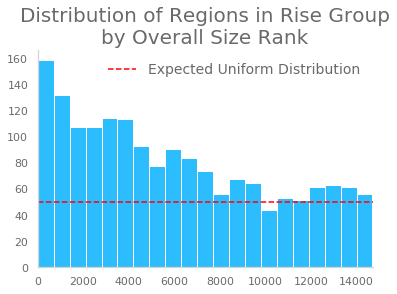

In [65]:

plt.hist(df_rise['SizeRank'], bins = 21)
plt.axhline(50,color='red',
            ls="--",label='Expected Uniform Distribution');
plt.xlim(0,df_rise['SizeRank'].max())
plt.legend(frameon=False, fontsize=14)
plt.title('Distribution of Regions in Rise Group\nby Overall Size Rank');

Clearly, the growth group skews bigger(especiall in big region size rank)

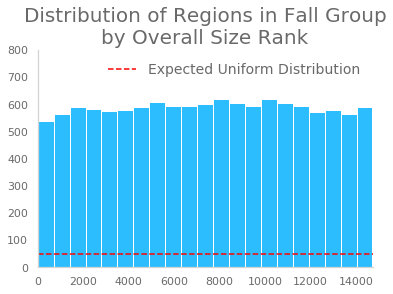

In [66]:
plt.hist(df_fall['SizeRank'], bins = 21)
plt.axhline(50,color='red',ls='--',label='Expected Uniform Distribution')
plt.xlim(0,df_fall['SizeRank'].max())
plt.ylim(0,800)
plt.legend(frameon=False, fontsize=14)
plt.title('Distribution of Regions in Fall Group\nby Overall Size Rank');

Based on those two graphs, we knew that the house price incresing more significant in big size region, which means 
more and more people prefer moving into big size region, which means bigger cities in these years. 

In [67]:
#The number of growth regions in the state
df_states['GrowthRegions'] = df.groupby('State').sum()['GrowthRegion']

#The share of state regions that are growth regions
df_states['%GrowthRegions'] = df_states['GrowthRegions']/ df_states['RegionCount']


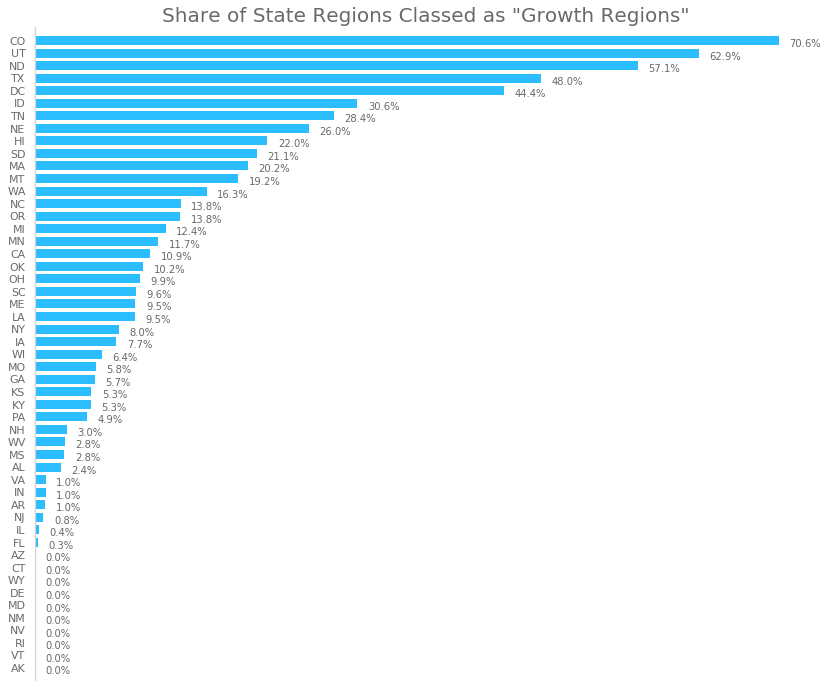

In [68]:
#Plot the share of state regions classed as growth regions
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values('%GrowthRegions')

plt.barh(df_states_ordered.index,df_states_ordered['%GrowthRegions'],height=0.8)

sns.despine(bottom=True)
plt.xticks([])     #######.  Remove X axis
plt.ylim(-1,51)

plt.title('Share of State Regions Classed as "Growth Regions"')

for i, v in enumerate(df_states_ordered['%GrowthRegions']):
    plt.text(v+0.01, i - 0.5, f'{str(round(v*100,1))}%', fontsize = 10)   ###### position of v and i here

The growth regions' distributions by state

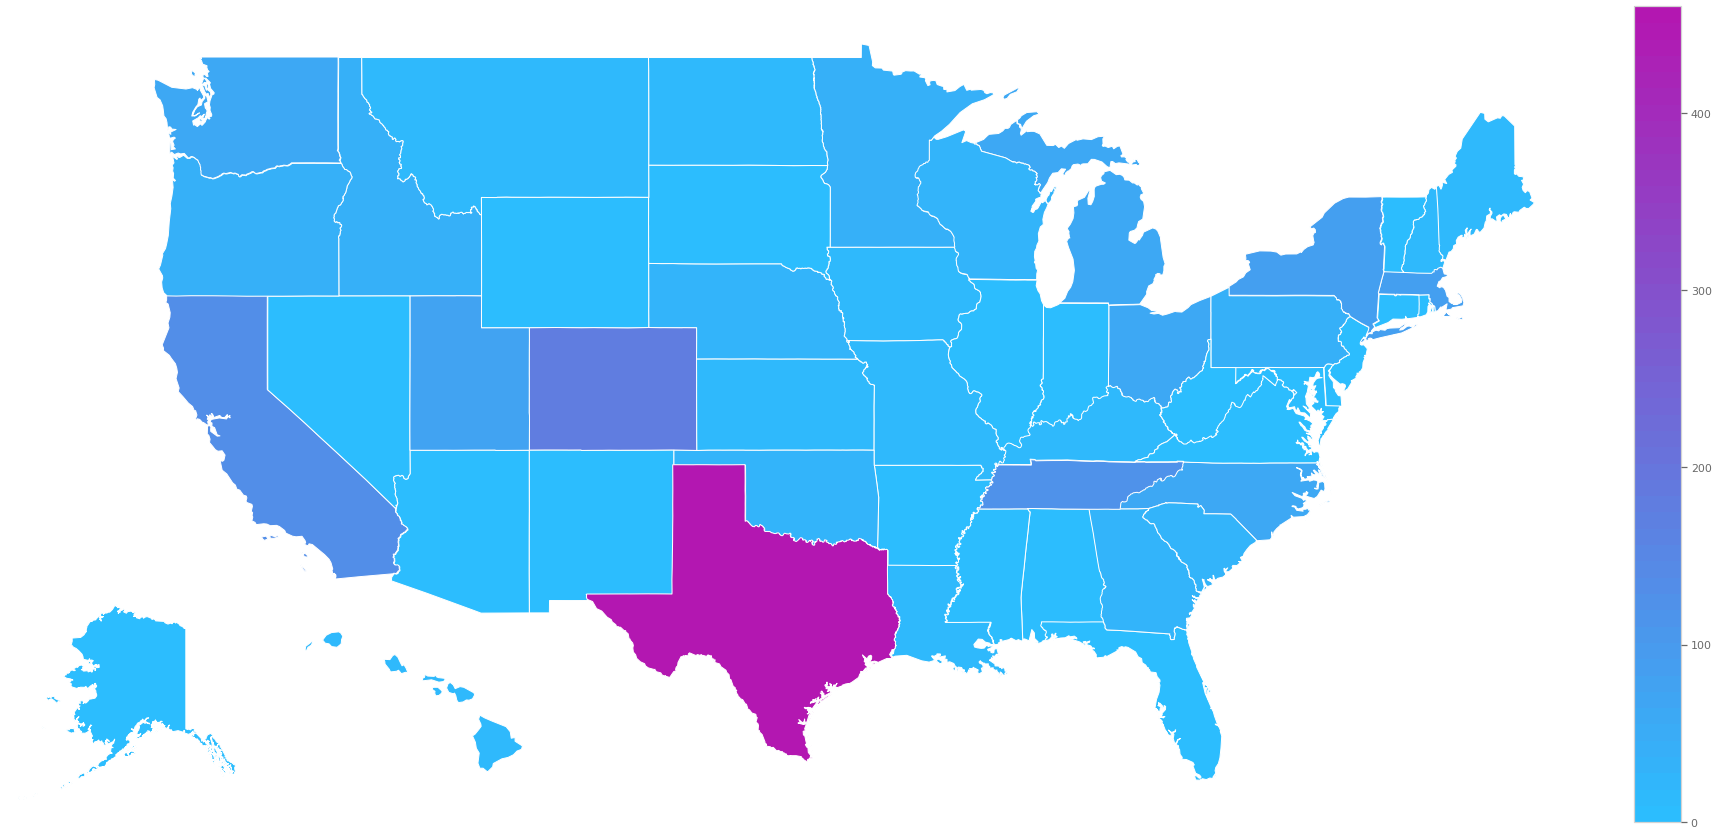

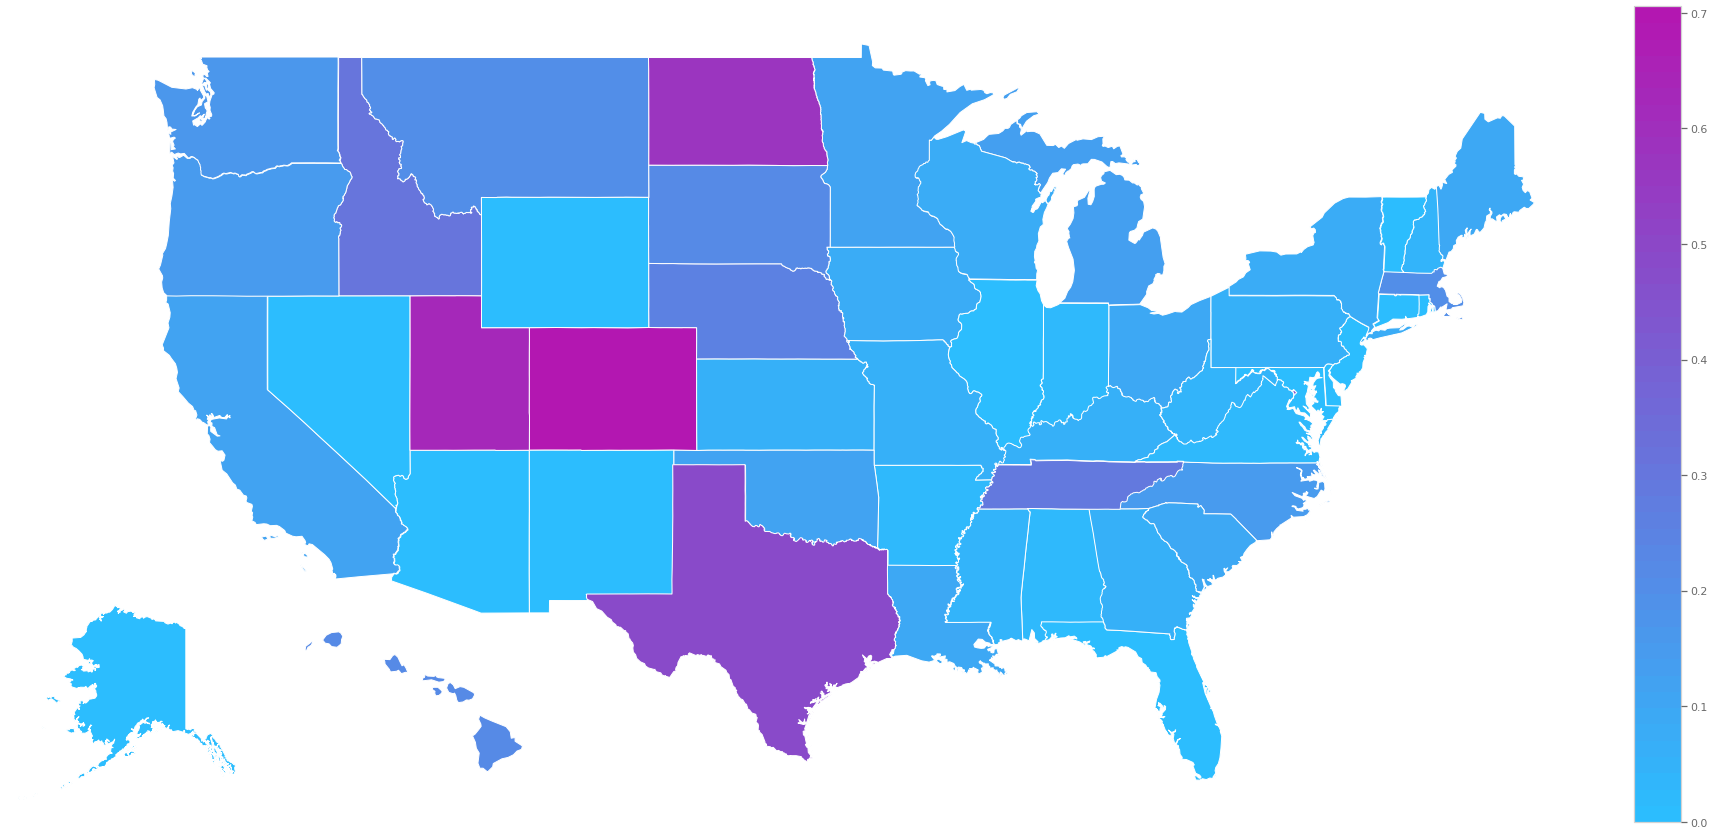

In [69]:
state_map('GrowthRegions',grad=CB91_Grad_BP,annot=False)
state_map('%GrowthRegions',grad=CB91_Grad_BP,annot=False)


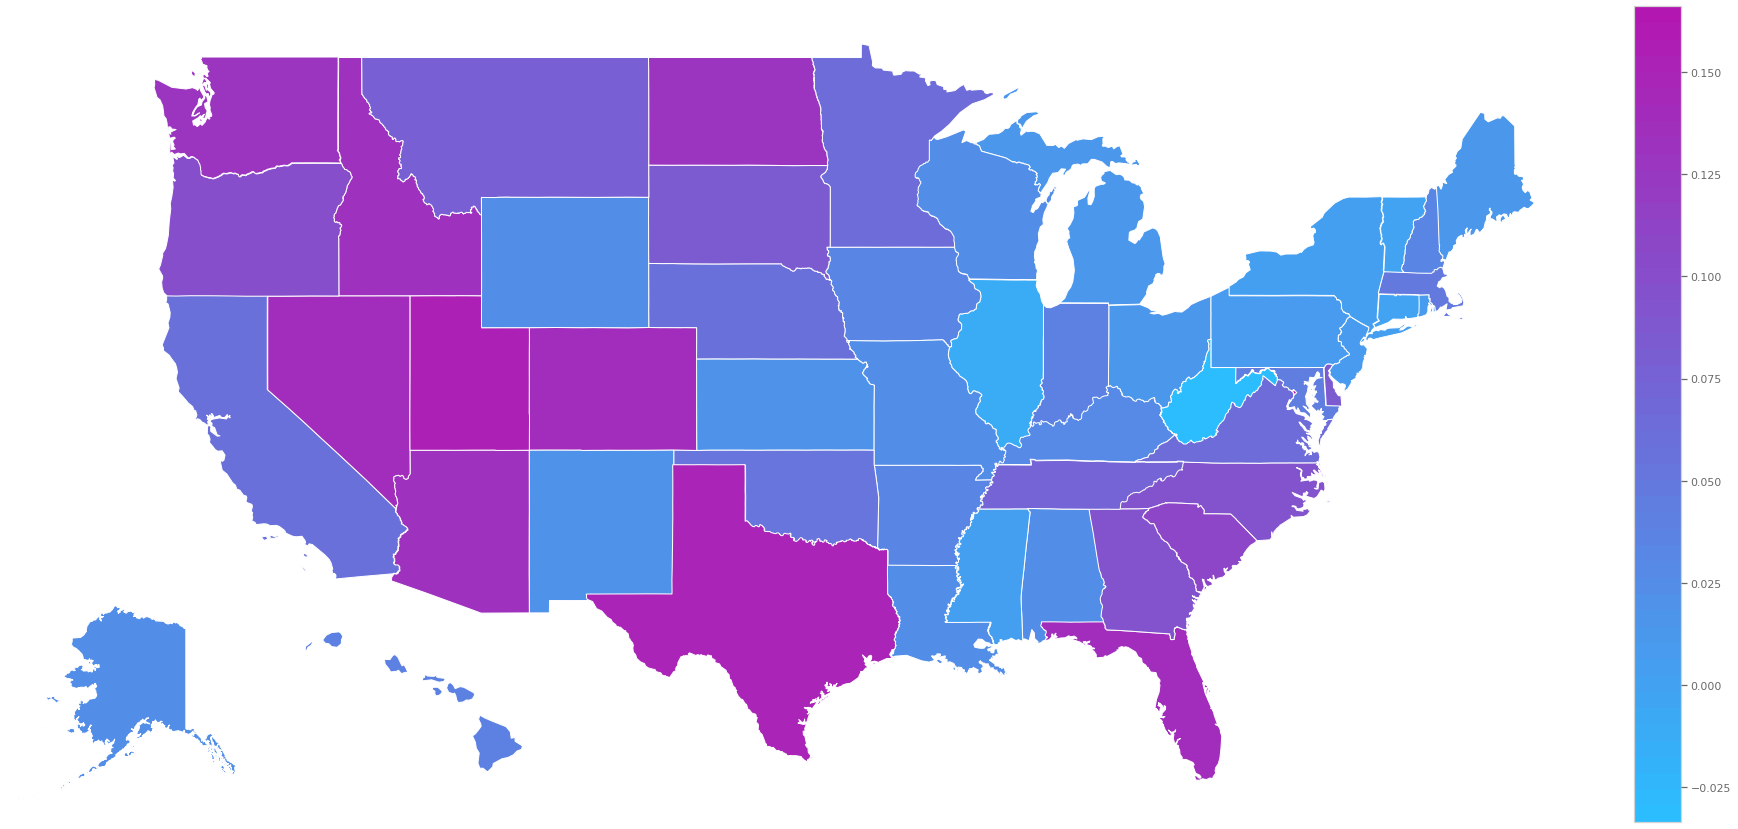

In [70]:
state_map('Incresement%',grad=CB91_Grad_BP,annot=False)

# Modeling

In [71]:
#Augmented Dickey-Fuller unit root test.
'''
The Augmented Dickey-Fuller test can be used to test for a 
unit root in a univariate process in the presence of serial correlation.
'''
dftest = adfuller(df_sum['50%'])
dftest2 = adfuller(df_sum['50%'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {dftest2[1]}')

p-value for all data = 0.587
p-value for data from April 2012 = 1.0


In [72]:
dftest = adfuller(df_sum['Mean'])
dftest2 = adfuller(df_sum['Mean'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {round(dftest2[1],3)}')


p-value for all data = 0.34
p-value for data from April 2012 = 0.998


In [73]:
def ts_filter(regions, start = '1996-04', end = '2018-04', df = df):
    '''Takes a list of regions, a start date, and and end date,
    and returns a time series dataframe with a region given in each column
    
    Parameters:
    - regions (list): The regions we want to keep
    - start (str): The first date to include in the dataframe (pass as 'YYYY-MM')
    - end (str): The last date to include in the dataframe (pass as 'YYYY-MM')
    - df (pandas dataframe): The dataframe we want to use    '''
    
    #Turn single entry into a list.
    #Allows user to enter a single regionID
    #if we just want to consider a single region
    if type(regions) != list:
        regions = [regions]
    
    #Change input dates to datetime objects
    start = pd.to_datetime(start, format='%Y-%m')
    end = pd.to_datetime(end, format='%Y-%m')
    
    #Create a new dataframe that filters regions,
    #and set the regionID to be the index
    df_temp = df.loc[df['RegionID'].isin(regions)]
    
    #We need to set the regionID to be a string
    #for the sake of the ARIMA modelling later
    df_temp['RegionID'] = df_temp['RegionID'].astype(str)
    df_temp.set_index(['RegionID'],inplace=True)

    #Find which columns the start and end dates represent in the dataframe
    columns = list(df_temp.columns)
    start_index = columns.index(start)
    end_index = columns.index(end)
    
    #Isolate the required dates in the dataframe
    #Transpose so that dates are the index
    df_temp = df_temp.iloc[:,start_index:end_index+1].T
    
    #We then need to reset the index, and set it back to the date
    #This ensures pandas treats the index elements as datetimes
    df_temp.reset_index(inplace=True)
    df_temp.set_index('index',inplace=True)
    
    return df_temp

In [74]:
#Define a standard series of parameters for the ARIMA model orders
p = q = d = [0,1,2]
d = [0,1]
#p : periods taken for autoregressive model
#d : integrated order, difference
#q : periods in moving average model
combs = list(itertools.product(p,d,q))  ##### the value itertions combination #####
split = 0.9
ts = ts_filter(region,start='2012-04')

In [75]:

def arima_output(region, start='2012-04', periods = 120, split = 0.9, combs = combs):
       
    ts = ts_filter(region,start=start)

    #order, output = arima_selection(ts=ts, combs=combs, split = 0.9)
    
    
           #Calculate the index of the series that we'll use to do the train test split
    limit = int(len(ts) * split)
    
    #Create the train test series
    train = ts[:limit]
    test = ts[limit:]
    
    #Declare variables that we'll update and return later on
    rmse = None
    best_model = None
    best_order = None
    best_rmse = 10000000
    
    #Loop through the combinations...
    for i in combs:
        try:
            #Fit a model on the training set
            model = ARIMA(train,order=i)##Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
            output = model.fit()
            #Predict forward the number equivalent to the length of the test set
            pred = output.forecast(len(test))[0]
            #Calculate the mean square error
            rmse = mean_squared_error(test, pred)**0.5
            
            #If we have a new best mse, then update the RMSE and model parameters
            if rmse < best_rmse:
                best_order = i
                best_rmse = rmse
                best_model = output

        except:
            continue
            
    if rmse == None:
        best_order =  None
    else:
        best_order, best_model

    
    
    #Guard against cases where no model could be fit to the region's data
    if best_order == None:
        return None

    else:
        #forecast, lower, upper = arima_forecast(output=output, periods=periods)
        forecast = output.forecast(periods)
        
        lower = [i[0] for i in forecast[2]]
        upper = [i[1] for i in forecast[2]]
        forecast = forecast[0]
        state = df.loc[df['RegionID']==region]['State'].item()
        county = df.loc[df['RegionID']==region]['CountyName'].item()

        df_temp = pd.DataFrame({'RegionID':[region],
                                'County':[county],
                                'State':[state],
                                'Order':[best_order],
                                'FittedModel':[best_model],
                                'Forecast':[forecast],
                                'Lower':[lower],
                                'Upper':[upper]})

        return df_temp


* Define region_df using function "arima_ouput"

* We got ARIMA " DataFrame" here, considering running time and RAM, we just store top 5 columns here

In [76]:
#Declare an empty dataframe
df_temp = pd.DataFrame()
    
    #Iterate through the regions in the list and
    #get the stats from the arima_output function
    ##################################################################################
    ##### considering running time and RAM, we just store top 5 columns here   #######
    ##################################################################################
for i in growth_regions[:5]:     
    ts = ts_filter(i,start='2012-04')
    region_df = arima_output(i, start='2012-04', periods=120, split = 0.9)
    ##################################################################################
    
    
    #Calculate the index of the series that we'll use to do the train test split
    limit = int(len(ts) * split)
    
    #Create the train test series
    train = ts[:limit]
    test = ts[limit:]
    
    #Declare variables that we'll update and return later on
    rmse = None
    best_model = None
    best_order = None
    best_rmse = 10000000
    
    #Loop through the combinations...
    for j in combs:
        try:
            #Fit a model on the training set
            model = ARIMA(train,order=i)##Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
            output = model.fit()
            #Predict forward the number equivalent to the length of the test set
            pred = output.forecast(len(test))[0]
            #Calculate the mean square error
            rmse = mean_squared_error(test, pred)**0.5
            
            #If we have a new best mse, then update the RMSE and model parameters
            if rmse < best_rmse:
                best_order = j
                best_rmse = rmse
                best_model = output

        except:
            continue
            
    if rmse == None:
        best_order =  None
    else:
        best_order, best_model
 
    #Guard against cases where no model could be fit to the region's data
    if best_order == None:
        #return None
        print('ddddd')

    else:
        #forecast, lower, upper = arima_forecast(output=output, periods=periods)
        forecast = output.forecast(periods)
        
        lower = [i[0] for i in forecast[2]]
        upper = [i[1] for i in forecast[2]]
        forecast = forecast[0]
        state = df.loc[df['RegionID']==i]['State'].item()
        county = df.loc[df['RegionID']==i]['CountyName'].item()

        df_temp = pd.DataFrame({'RegionID':[i],
                                'County':[county],
                                'State':[state],
                                'Order':[best_order],
                                'FittedModel':[best_model],
                                'Forecast':[forecast],
                                'Lower':[lower],
       
    ##################################################################################
    df_temp = pd.concat([df_temp,region_df])
    #################################################################################
  

  
    
df_temp

ddddd
ddddd
ddddd
ddddd
ddddd


,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper
0,90668,Collin,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[312255.93670777197, 314455.39290832344, 31659...","[311491.7747102261, 312499.2852796401, 313437....","[313020.0987053178, 316411.50053700677, 319749..."
0,91733,Harris,TX,"(2, 0, 1)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[159790.44849852956, 160778.48316081116, 16163...","[159371.72994452974, 159595.3717054279, 159619...","[160209.16705252937, 161961.5946161944, 163651..."
0,91940,Harris,TX,"(1, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[168281.26959512656, 169158.89665271042, 16998...","[167810.50202248307, 167920.4653285723, 167835...","[168752.03716777006, 170397.32797684855, 17214..."
0,97564,San Francisco,CA,"(1, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[3768578.453039132, 3783978.2067296878, 380167...","[3748247.0996379727, 3724251.410501007, 369911...","[3788909.8064402915, 3843705.0029583685, 39042..."
0,62037,Kings,NY,"(0, 1, 0)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[843352.7203163983, 841089.0285997501, 841342....","[833929.3382905083, 819909.1990107171, 809459....","[852776.1023422884, 862268.8581887832, 873225...."


* Storing the dataset using pickle.dump, in the next annotate code-column

In [78]:
#with open('arima_df.pickle', 'wb') as f:
#    pickle.dump(arima_df, f, pickle.HIGHEST_PROTOCOL)

In [79]:
with open('data/arima_df.pickle', 'rb') as file:
    arima_df = pickle.load(file)

arima_df.reset_index(inplace=True, drop=True)
arima_df.head()

,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper
0,90668,Collin,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[312143.40643119154, 314064.3150512036, 315783...","[311295.6384028486, 311722.3738888332, 311647....","[312991.17445953446, 316406.256213574, 319920...."
1,91733,Harris,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[159747.67657177543, 160654.7091093458, 161428...","[159291.82129491118, 159377.0017145843, 159173...","[160203.5318486397, 161932.4165041073, 163683...."
2,91940,Harris,TX,"(1, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[168312.6330976554, 169293.82987167052, 170217...","[167829.78990906934, 168010.72145518934, 16795...","[168795.47628624146, 170576.9382881517, 172481..."
3,97564,San Francisco,CA,"(1, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[3763964.854690347, 3764029.6776224324, 376409...","[3695309.2818519226, 3666959.8050405267, 36452...","[3832620.427528771, 3861099.550204338, 3882951..."
4,62037,Kings,NY,"(0, 1, 0)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[855881.25, 860762.5, 865643.75, 870525.0, 875...","[841787.4753875756, 840830.8927980798, 841232....","[869975.0246124244, 880694.1072019202, 890054...."


In [80]:
arima_df['ARParams'] = arima_df['FittedModel'].map(lambda x: x.arparams)
arima_df['MAParams'] = arima_df['FittedModel'].map(lambda x: x.maparams)

arima_df['ModelAIC'] = arima_df['FittedModel'].map(lambda x: x.aic)
arima_df['ModelBIC'] = arima_df['FittedModel'].map(lambda x: x.bic)

#arima_df['Modelpvals'] = arima_df['FittedModel'].map(lambda x: x.pvalues)

In [81]:
arima_df.dropna(inplace=True)

# 5. Interpreting Results

In [82]:
len(arima_df['Forecast'][0])

120

In [83]:
arima_df['Abs5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59] - x[0])  ##### Predict 5 Years
arima_df['%5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59]/x[0] - 1)


arima_df['Abs10yGrowth'] = arima_df['Forecast'].map(lambda x: x[119] - x[0])   ###### Predict 10 Years
arima_df['%10yGrowth'] = arima_df['Forecast'].map(lambda x: x[-1]/x[0] - 1)

arima_df.sort_values('%10yGrowth', ascending=False)


,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper,ARParams,MAParams,ModelAIC,ModelBIC,Abs5yGrowth,%5yGrowth,Abs10yGrowth,%10yGrowth
697,91559,McLennan,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[105085.16463331353, 106901.1734661564, 108747...","[104367.73632177095, 104989.71156263929, 10534...","[105802.59294485611, 108812.6353696735, 112154...","[1.9942938153586824, -0.9943231187118033]","[-0.5247542618419677, -0.4749444172715242]",954.827173,967.780472,158176.647164,1.505223,416268.669026,3.961251
1111,93636,Pueblo,CO,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[175093.56282152238, 176050.004591286, 177070....","[174315.36467656653, 174066.62250669362, 17358...","[175871.76096647824, 178033.3866758784, 180557...","[1.998172978967835, -0.9982562280869269]","[-0.6538615273077499, -0.34613808266810625]",966.886500,979.839798,184659.581624,1.054634,692601.950925,3.955611
534,93024,Taylor,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[103666.55164536668, 104669.46299205805, 10570...","[102985.0171392703, 102721.65165481692, 102162...","[104348.08615146305, 106617.27432929918, 10925...","[1.996450352572352, -0.9965002312455917]","[-0.31913000849885764, -0.6808695780517263]",949.603065,962.556364,126951.155822,1.224611,409965.252970,3.954653
1246,67605,Henrico,VA,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[207700.15958550357, 210464.26860853142, 21329...","[206566.1344282922, 207400.0451436887, 207820....","[208834.18474271495, 213528.49207337413, 21876...","[1.984523693502028, -0.9845767608187883]","[-0.4743004116739685, -0.5256972456083303]",1012.529304,1025.482603,249020.548360,1.198942,611791.729369,2.945553
16,90654,Dallas,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[189611.71227933312, 191063.59600190615, 19255...","[189110.25389139703, 189715.50103860276, 19014...","[190113.1706672692, 192411.69096520953, 194967...","[1.9979015641823878, -0.9980095996742788]","[-0.5024620673463988, -0.4975379323065289]",910.953709,923.907007,169097.895107,0.891811,548569.693383,2.893121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,90676,Dallas,TX,"(2, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[261301.4057549472, 262806.9619269294, 264119....","[260264.81507305612, 260518.8261056818, 260339...","[262337.99643683824, 265095.097748177, 267899....","[1.9678587449433684, -0.9697736955724048]",[],1019.547200,1028.244749,-81257.223496,-0.310971,-83436.851228,-0.319313
611,93316,Adams,CO,"(2, 0, 1)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[361614.3071562405, 363418.4769290527, 365112....","[360884.1295074525, 361557.93257857097, 361856...","[362344.48480502854, 365279.0212795344, 368369...","[1.980766498914501, -0.9816673033858755]",[0.36287699685445685],979.111986,989.983923,-36509.500571,-0.100963,-118215.635429,-0.326911
860,90682,Dallas,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[231003.6978224714, 232967.78180904288, 234767...","[230311.2586842647, 231140.81542296393, 231608...","[231696.13696067812, 234794.74819512182, 23792...","[1.9607983901218304, -0.9621442175387527]","[0.48080374942917525, -0.10363009778238919]",972.627763,985.674086,-38805.609595,-0.167987,-76140.756437,-0.329608
1169,83593,Ramsey,ND,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[140575.60702398288, 141043.8711293792, 141492...","[140142.3184073801, 140176.60977510497, 140345...","[141008.89564058566, 141911.13248365343, 14263...","[1.9989879527396055, -0.9998551492187067]","[-0.2651142236657782, -0.7348856729837855]",913.562665,926.608988,-9562.640315,-0.068025,-47976.185508,-0.341284


* An example of probability density

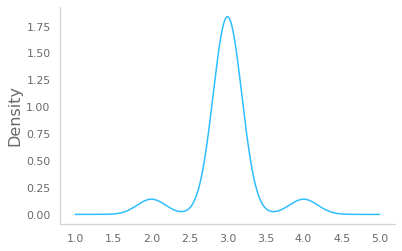

In [84]:
s = pd.Series([2, 3, 3.5,3.6,3.7,3.8, 4,4.2, 4.3,4.4,4.5, 5, 6])
s1=pd.Series([2,2,3,3,3,3,3,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
ax = s1.plot.kde()

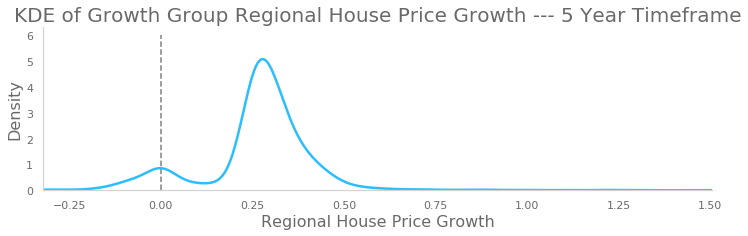

In [85]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html
plt.figure(figsize=(12,3))
arima_df['%5yGrowth'].plot.kde(lw=2.5);
'''Generate Kernel Density Estimate plot using Gaussian kernels.
In statistics, kernel density estimation (KDE) is a non-parametric 
way to estimate the probability density function (PDF) of a random 
variable. This function uses Gaussian kernels and includes automatic bandwidth determination.'''
plt.vlines(0,0,6,color='grey',linestyles='dashed')

plt.xlim(arima_df['%5yGrowth'].min(),arima_df['%5yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth --- 5 Year Timeframe')
plt.xlabel('Regional House Price Growth');

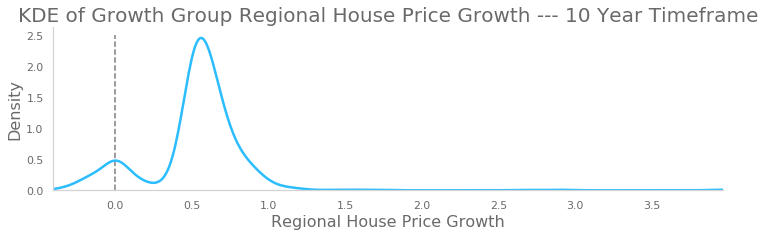

In [86]:
plt.figure(figsize=(12,3))
arima_df['%10yGrowth'].plot.kde(lw=2.5);
plt.vlines(0,0,2.5,color='grey',linestyles='dashed')

plt.xlim(arima_df['%10yGrowth'].min(),arima_df['%10yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth --- 10 Year Timeframe')
plt.xlabel('Regional House Price Growth');

In [87]:
def forecast_width(regionID):
    
    #Isolate the region
    region = arima_df.loc[arima_df['RegionID']==regionID]

    #Find the forecast and lower/upper limits for the last forecasted period
    y_forecast = region['Forecast'].item()[-1]
    y_lower = region['Lower'].item()[-1]
    y_upper = region['Upper'].item()[-1]
    
    return (y_upper - y_lower) / y_forecast

arima_df['ForecastWidth'] = arima_df['RegionID'].map(lambda x: forecast_width(x))

In [88]:
#region = arima_df.loc[arima_df['RegionID']==91559]
#print(region['Forecast'].item()[-1])  ##.  521353.8336596232
#print(region['Lower'].item()[-1]) ##   -94076.31576351699
#print(region['Upper'].item()[-1]) ##. 1136783.9830827634
#arima_df
#calculate the average x and y values
avg_x = arima_df['%10yGrowth'].mean()
avg_y = arima_df['ForecastWidth'].mean()


In [117]:
'''
plt.figure(figsize=(14,12))

# shade the region that is above both averages
plt.fill_between([avg_x*100, 400], [0,0], [avg_y*100, avg_y*100],
        color=CB91_Green, alpha=0.2)

plt.fill_between([avg_x*100, 400], [avg_y*100+1, avg_y*100+1], [275,275], 
        color=CB91_Purple, alpha=0.1)

#plot the scatter
plt.scatter(arima_df['%10yGrowth'] * 100, arima_df['ForecastWidth'] * 100,
            alpha=0.5, s=35, label='Region');

#and plot a point showing the average
plt.scatter(avg_x * 100, avg_y * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

plt.axhline(0,color='lightgrey')
plt.axvline(0,color='lightgrey')

plt.ylim(0,300)
plt.xlim(-50,500)

plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Growth Regions - Price Forecast Characteristics')
plt.xlabel('Average Forecast Price Growth (10 Year Horizon)');
plt.ylabel('Forecast Width Using 95% Confidence Interval\
\n(As a Share of Region Average Forecast)');
'''

"\nplt.figure(figsize=(14,12))\n\n# shade the region that is above both averages\nplt.fill_between([avg_x*100, 400], [0,0], [avg_y*100, avg_y*100],\n        color=CB91_Green, alpha=0.2)\n\nplt.fill_between([avg_x*100, 400], [avg_y*100+1, avg_y*100+1], [275,275], \n        color=CB91_Purple, alpha=0.1)\n\n#plot the scatter\nplt.scatter(arima_df['%10yGrowth'] * 100, arima_df['ForecastWidth'] * 100,\n            alpha=0.5, s=35, label='Region');\n\n#and plot a point showing the average\nplt.scatter(avg_x * 100, avg_y * 100, s=200,\n            color=CB91_Purple, marker='X', label='Mean Values');\n\nplt.axhline(0,color='lightgrey')\nplt.axvline(0,color='lightgrey')\n\nplt.ylim(0,300)\nplt.xlim(-50,500)\n\nplt.legend(loc=2, frameon=False, fontsize=14)\n\nplt.title('Growth Regions - Price Forecast Characteristics')\nplt.xlabel('Average Forecast Price Growth (10 Year Horizon)');\nplt.ylabel('Forecast Width Using 95% Confidence Interval\n(As a Share of Region Average Forecast)');\n"

In [90]:
def max_no_na(x):
    if len(list(x.dropna())) == 0:
        return None
    else:
        return max(list(x.dropna()))
    #return (x)
#arima_df['Maxpval'] = arima_df['Modelpvals'].map(lambda x: max_no_na(x))

In [156]:
region_i = arima_df.loc[arima_df['RegionID']==62027]
y_forecast = region_i['Forecast'].item()[:60]
y_forecast

array([1520607.8125, 1535115.625 , 1549623.4375, 1564131.25  ,
       1578639.0625, 1593146.875 , 1607654.6875, 1622162.5   ,
       1636670.3125, 1651178.125 , 1665685.9375, 1680193.75  ,
       1694701.5625, 1709209.375 , 1723717.1875, 1738225.    ,
       1752732.8125, 1767240.625 , 1781748.4375, 1796256.25  ,
       1810764.0625, 1825271.875 , 1839779.6875, 1854287.5   ,
       1868795.3125, 1883303.125 , 1897810.9375, 1912318.75  ,
       1926826.5625, 1941334.375 , 1955842.1875, 1970350.    ,
       1984857.8125, 1999365.625 , 2013873.4375, 2028381.25  ,
       2042889.0625, 2057396.875 , 2071904.6875, 2086412.5   ,
       2100920.3125, 2115428.125 , 2129935.9375, 2144443.75  ,
       2158951.5625, 2173459.375 , 2187967.1875, 2202475.    ,
       2216982.8125, 2231490.625 , 2245998.4375, 2260506.25  ,
       2275014.0625, 2289521.875 , 2304029.6875, 2318537.5   ,
       2333045.3125, 2347553.125 , 2362060.9375, 2376568.75  ])

In [148]:
def plot_forecasts(regions, labels=None, plot_range=True, start='2012-04', months=60, size=(16,8)):
    

    #If we pass a single integer, put it in a list
    if type(regions) != list:
        regions = [regions]
    
    #Initiate a figure
    plt.figure(figsize=size)
    
    #Initiate a color counter
    counter=0
    
    #Iterate through each region and plot one by one
    for i in regions:
        #Find the non-forecasted part
        ts_real = ts_filter(i).iloc[:,:]     ###### ts_real is DataFrame
        x_real = ts_real.index
        y_real = ts_real
        #Work out how much we need to extend the x axis for the forecasts
        x_forecast = pd.date_range('2018-05-01', periods=months, freq='MS')
        
        #Identify the region, and plot it using the color from color list
        region_i = arima_df.loc[arima_df['RegionID']==i]
        
        #Specify the label
        if labels == None:
            label = f"{region_i['County'].item()} County, {region_i['State'].item()}"
        else:
            label = f"{labels[counter]}, {region_i['State'].item()}"
        
        y_forecast = region_i['Forecast'].item()[:months]

        color = color_list[counter]
        
        plt.plot(x_real, y_real, color=color,label = label, lw = 3)
        plt.plot(x_forecast,y_forecast, color=color, ls='--', label = '', lw = 3)
        
        #If we are showing ranges, find and plot these
        #if plot_range==True:
        y_lower = region_i['Lower'].item()[:months]
        y_upper = region_i['Upper'].item()[:months]
        plt.fill_between(x_forecast, y_lower, y_upper,facecolor=color, alpha = 0.15, interpolate=True)
        
        counter += 1

    plt.title('Price Forecasts (Limits Given to 95% Confidence Interval)')
    plt.ylabel('Avearge House Prices in Region ($)');
    
    plt.xlim(pd.to_datetime('2012-04', format='%Y-%m'),x_forecast[-1])
    plt.ylim(0,)

    plt.legend(loc=2, fontsize=14, frameon=False);

## Top 10 increasing regions

['McLennan', 'Pueblo', 'Taylor', 'Henrico', 'Dallas', 'Cannon', 'Minidoka', 'Tarrant', 'Davidson', 'Denton', 'Santa Clara', 'Rutherford', 'Davidson', 'Santa Clara', 'Davidson', 'Santa Clara', 'Wake', 'San Mateo', 'Santa Clara']


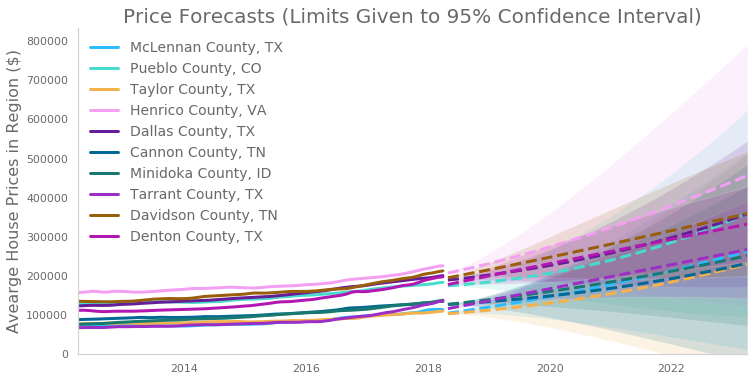

In [149]:
high_growth = list(arima_df.sort_values('%10yGrowth',ascending=False)['RegionID'][:10])
print(list(arima_df.sort_values('%10yGrowth',ascending=False)['County'][:19]))

plot_forecasts((high_growth), size=(12,6))
#############.    Real value, forecast value and ARIMA lower and higher value.    ##################

* There are 5 counties belong to Texas among top 10 increase counties in last 10 years

## Top 10 the most valuable regions

In [93]:
best_regions = list(arima_df.loc[(arima_df['%10yGrowth'] > avg_x) &(arima_df['ForecastWidth'] < avg_y)].sort_values(
    '%10yGrowth', ascending=False)['RegionID'][:10])
print(best_regions)
reg_labels = []
#x = pd.DataFrame()
for i in best_regions:
    
    x = arima_df[arima_df['RegionID'] == i]
    #print(pd.DataFrame(x['County']))
    
    reg_labels.append(list(x['County']))

print(reg_labels)
outlst = [' '.join([str(c) for c in lst]) for lst in reg_labels]
outlst

[97530, 97702, 62027, 90671, 97513, 97691, 97920, 69450, 93281, 97693]
[['Santa Clara'], ['San Mateo'], ['Kings'], ['Collin'], ['Santa Clara'], ['Santa Clara'], ['Santa Clara'], ['Wake'], ['Denver'], ['Santa Clara']]


['Santa Clara',
 'San Mateo',
 'Kings',
 'Collin',
 'Santa Clara',
 'Santa Clara',
 'Santa Clara',
 'Wake',
 'Denver',
 'Santa Clara']

* If a county has 10yGrowth bigger than average and ForecastWidth smaller than average, it will have the better prospects and lower risks.

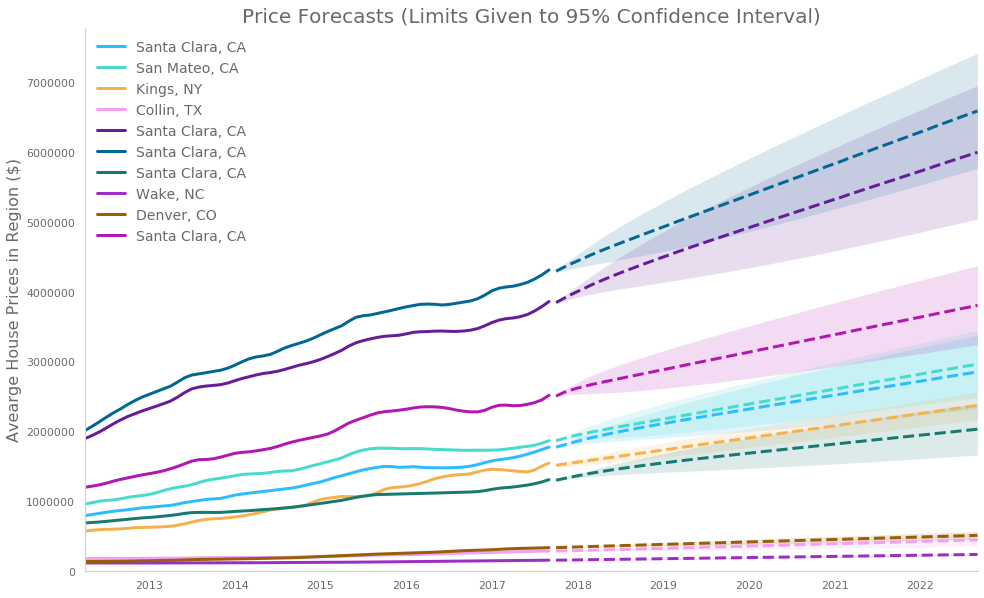

In [94]:
#reg_labels = ['Mountan View', 'Kings County', 'Plano', 'Los Altos', 'Palo Alto']

plot_forecasts(best_regions, labels = outlst, size=(16,10))


In [95]:
best_regions

[97530, 97702, 62027, 90671, 97513, 97691, 97920, 69450, 93281, 97693]

# Conclusion

In [96]:
df.loc[df['RegionID'].isin(best_regions)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,GrowthRegion,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
172,69450,27610,Raleigh,NC,Raleigh,Wake,173,1,113000.0,111700.0,...,156500,158000,159500,161000,162200,163200,164200,165600,167500,168800
475,62027,11216,New York,NY,New York,Kings,476,1,146100.0,146600.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700
656,97920,95008,Campbell,CA,San Jose,Santa Clara,657,1,262100.0,263000.0,...,1254500,1280700,1313600,1351000,1389200,1421000,1445700,1474600,1512900,1539900
1892,90671,75075,Plano,TX,Dallas-Fort Worth,Collin,1893,1,151600.0,151200.0,...,286000,288400,291200,293600,295200,296800,299000,302200,305300,306400
2054,97693,94303,Palo Alto,CA,San Jose,Santa Clara,2055,1,374300.0,375900.0,...,2416900,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900
2155,93281,80204,Denver,CO,Denver,Denver,2156,1,72700.0,73200.0,...,332300,335300,339500,344100,348300,353000,356800,360800,366600,371600
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,1,291700.0,294000.0,...,1709400,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900
4099,97702,94402,San Mateo,CA,San Francisco,San Mateo,4100,1,411200.0,411500.0,...,1806500,1835300,1871800,1902600,1934600,1972700,2002900,2025100,2052100,2069000
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,1,709500.0,711900.0,...,4188300,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,1,795600.0,798400.0,...,3730400,3793300,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600


In [97]:
calc_returns(best_regions).tail()

NameError: name 'calc_returns' is not defined